#Sentiment Analysis on Drug Review Dataset (Drugs.com)
Greta Gravina, g.gravina8@campus.unimib.it

## Data import

In [ ]:
## Import libraries
%%capture
import pandas as pd
import csv, html, re, itertools, scipy, time
import numpy as np
import warnings

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.manifold import TSNE
from wordcloud import WordCloud

# Bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.palettes import all_palettes
output_notebook()

# Genism and sklearn
from gensim.models import LdaModel
from gensim import corpora
from sklearn.manifold import TSNE

# Filter warning
warnings.filterwarnings('ignore')

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load data
data = pd.read_csv("/content/drive/MyDrive/Text Mining/data_train_class_balanced_9-4.csv").drop('Unnamed: 0', axis = 1)
data['review'] = data['review'].apply(html.unescape)

## Data Visualization

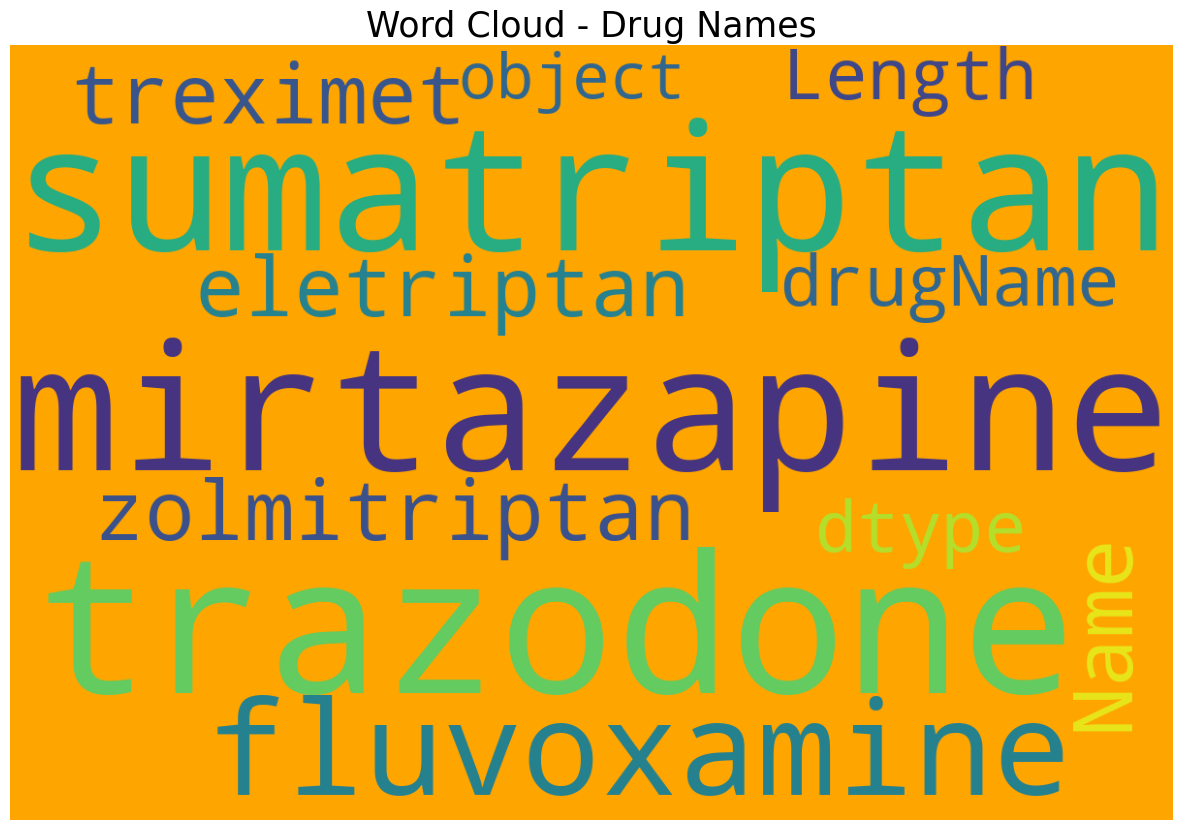

In [ ]:
# Word Clouds

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

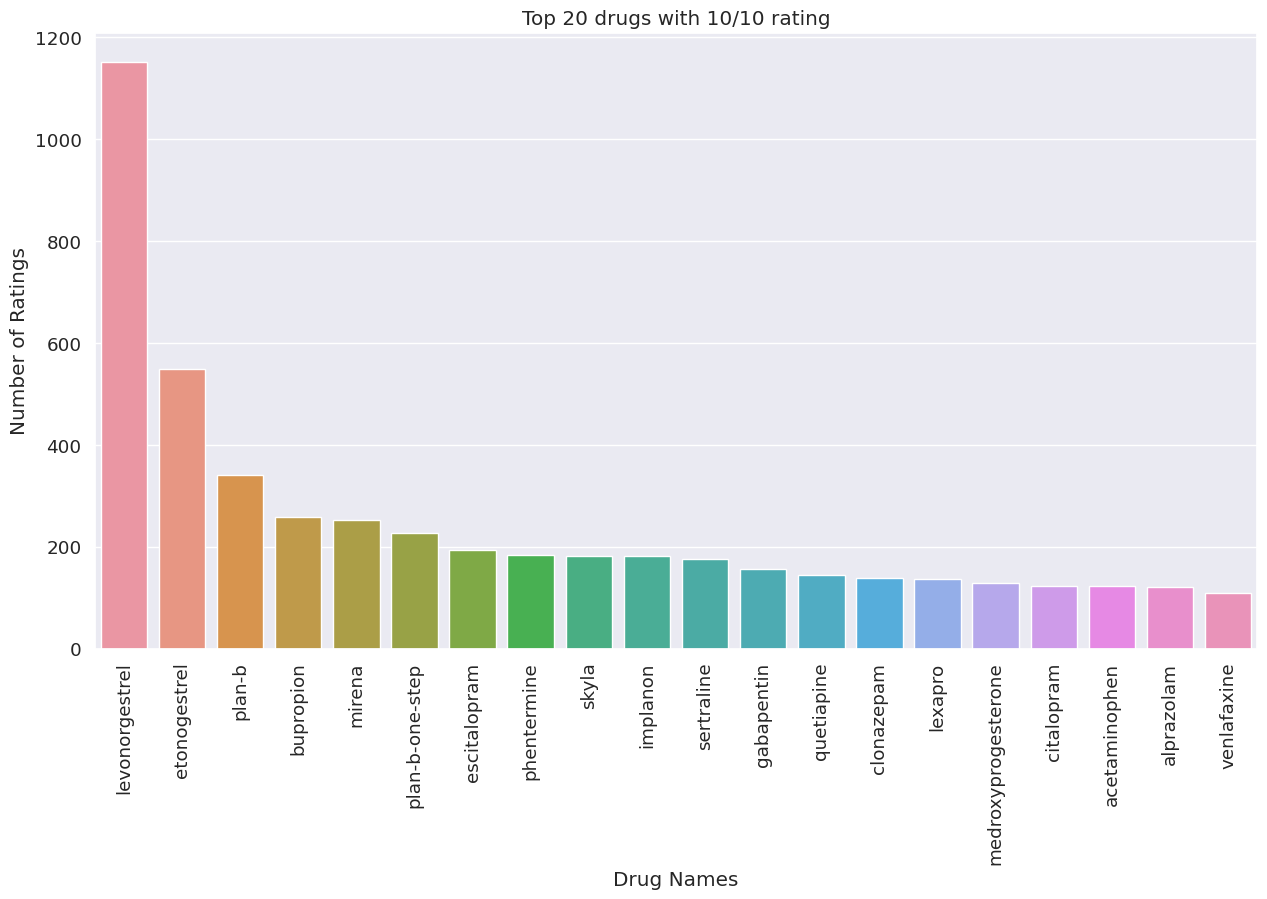

In [ ]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

In [ ]:
data['drugName']


0           trazodone
1         fluvoxamine
2         mirtazapine
3           trazodone
4         mirtazapine
             ...     
36089    zolmitriptan
36090      eletriptan
36091     sumatriptan
36092        treximet
36093     sumatriptan
Name: drugName, Length: 36094, dtype: object

'Levonorgestrel' is the drug with the highest number of 10/10 ratings, about 1883 Ratings in the data set for 'Levonorgestrel'.

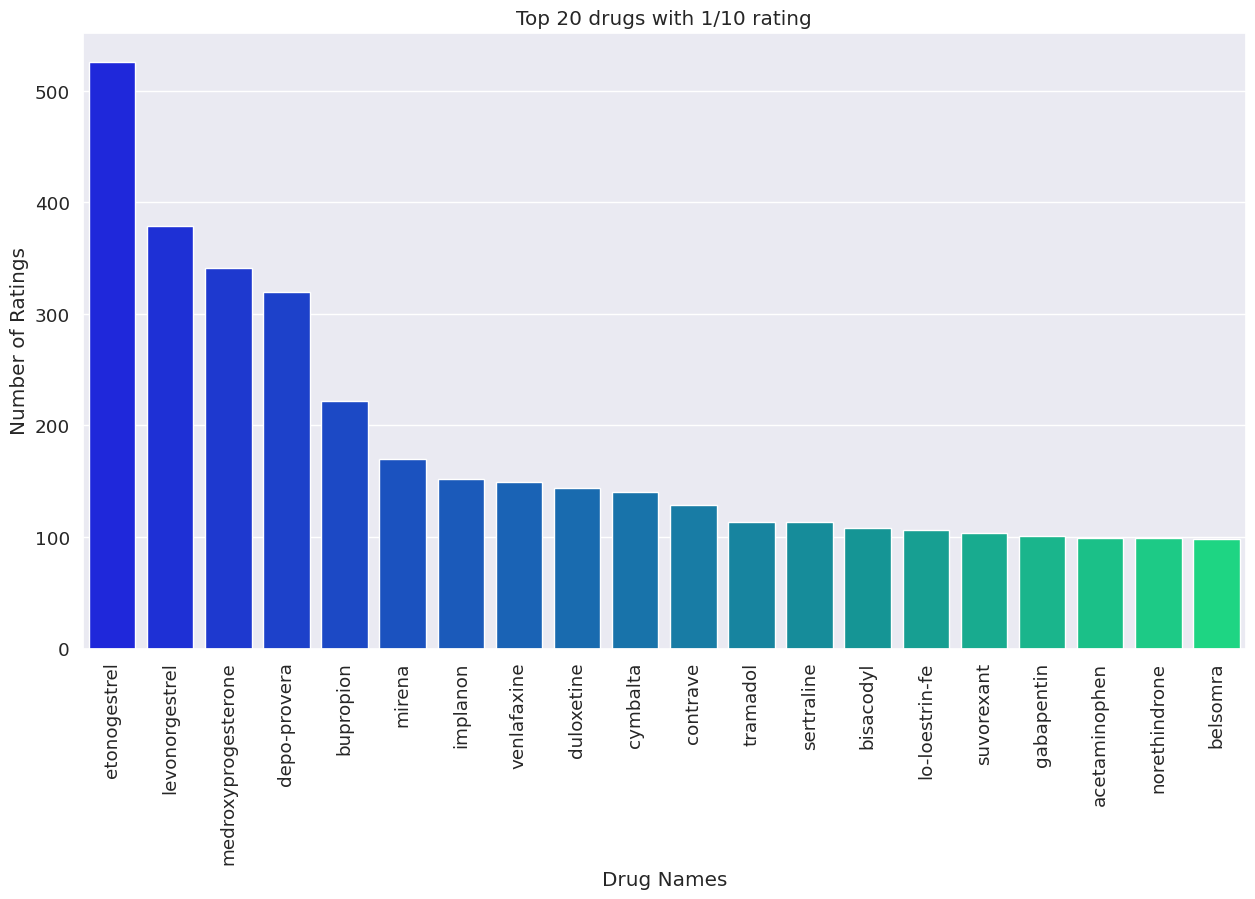

In [ ]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

The is a bar graph thatshows the top 20 drugs given in the data set with a rating of 1/10. 'Etonogestrel' is the drug with the highest number of 1/10 ratings, about 767.

In [ ]:
data["rating"]

0        10.0
1         9.0
2        10.0
3        10.0
4        10.0
         ... 
36089     2.0
36090     1.0
36091     2.0
36092     1.0
36093     1.0
Name: rating, Length: 36094, dtype: float64

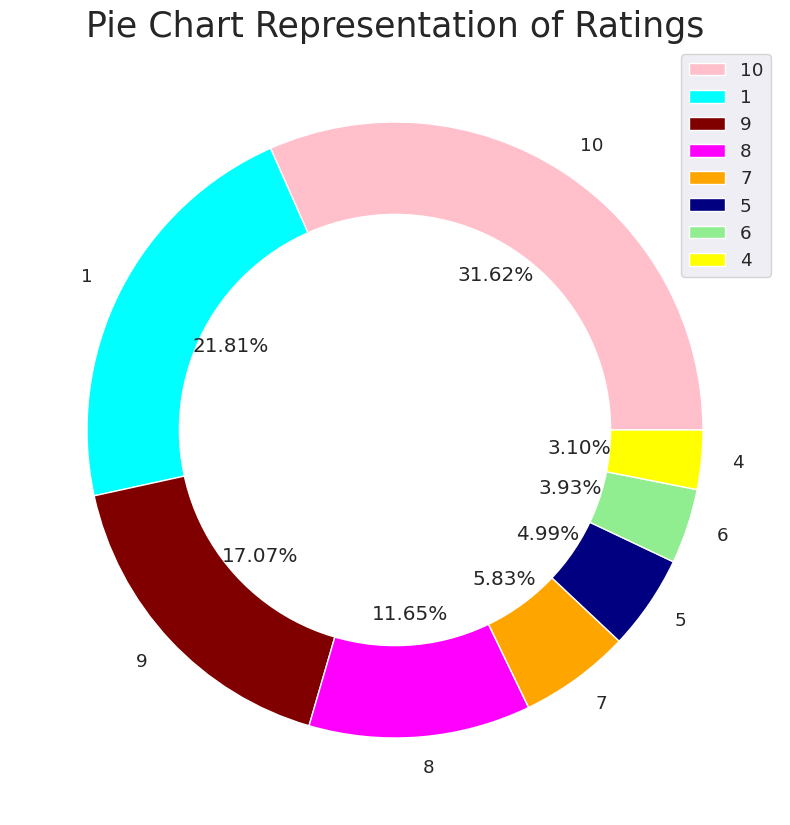

In [ ]:
# making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
data.head()

drugName           condition  \
0    trazodone            Insomnia   
1  fluvoxamine  Anxiety and Stress   
2  mirtazapine             Anxiety   
3    trazodone          Depression   
4  mirtazapine             Anxiety   

                                              review  rating  \
0  "I have insomnia, it's horrible. My story begi...    10.0   
1  "I've suffered from panic attacks and anxiety ...     9.0   
2  "Suffered from anxiety and depression for 3 mo...    10.0   
3  "I take trazodone to help balance the effects ...    10.0   
4  "I have taken this medicine for 7 years. Gaine...    10.0   

               date  positiveness        drugClass  
0     April 3, 2016             1  antidepressants  
1   January 3, 2011             1  antidepressants  
2      May 31, 2012             1  antidepressants  
3      June 1, 2016             1  antidepressants  
4  November 6, 2012             1  antidepressants

Text(0.5, 0, 'Rating')

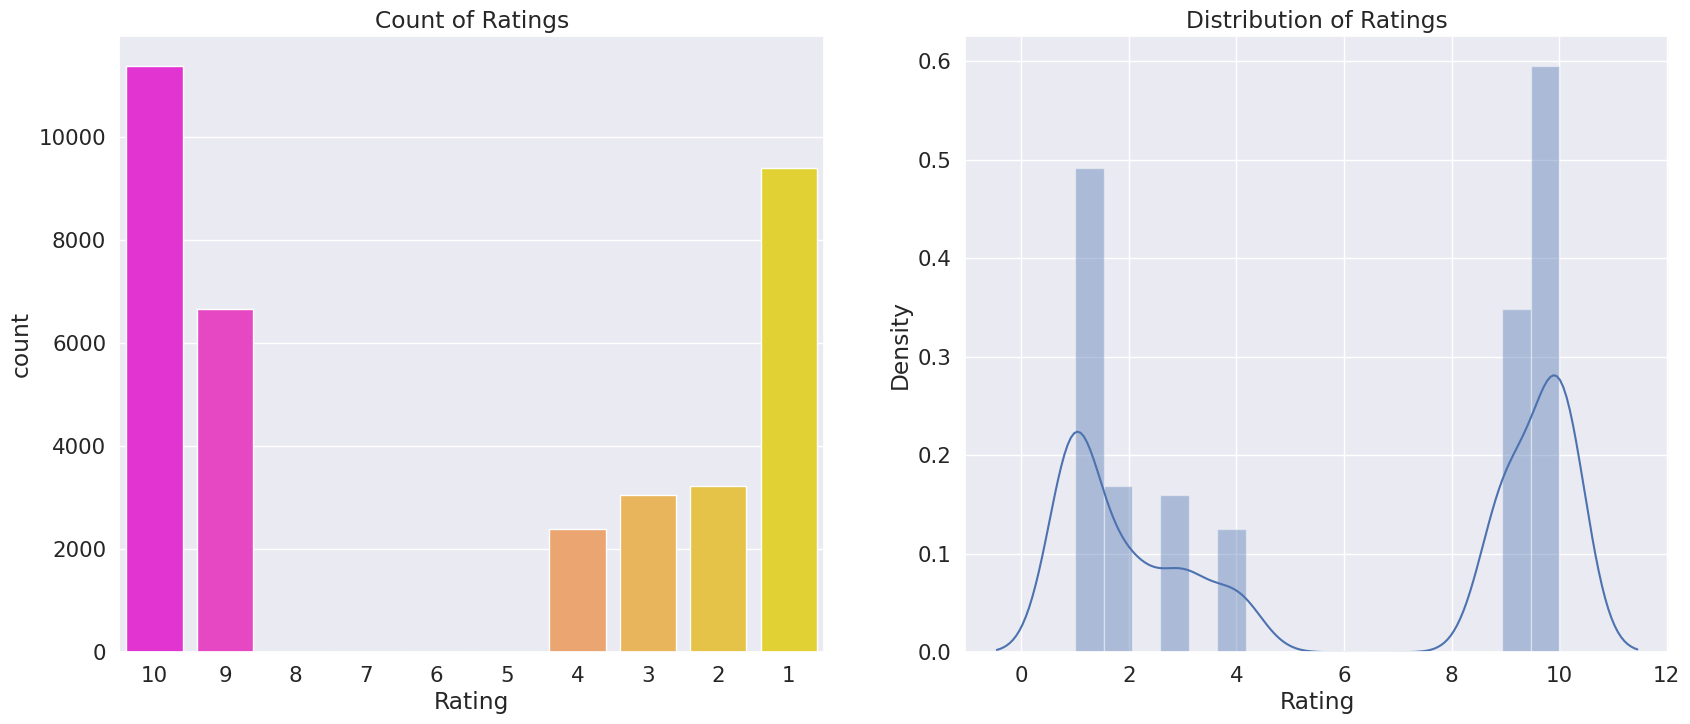

In [ ]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(x=data["rating"], palette="spring",order = list(range(10, 0, -1)), ax = ax[0])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

The shows a distribution plot on the right hand side and a bar graph of the same on the left hand side. This shows the distribution of the ratings from 1 to 10 in the data set.
We kept only the score 10-9 and 4-3-2-1.

In [ ]:
data['rating']==8&7&6&5

0        False
1        False
2        False
3        False
4        False
         ...  
36089    False
36090    False
36091    False
36092    False
36093    False
Name: rating, Length: 36094, dtype: bool

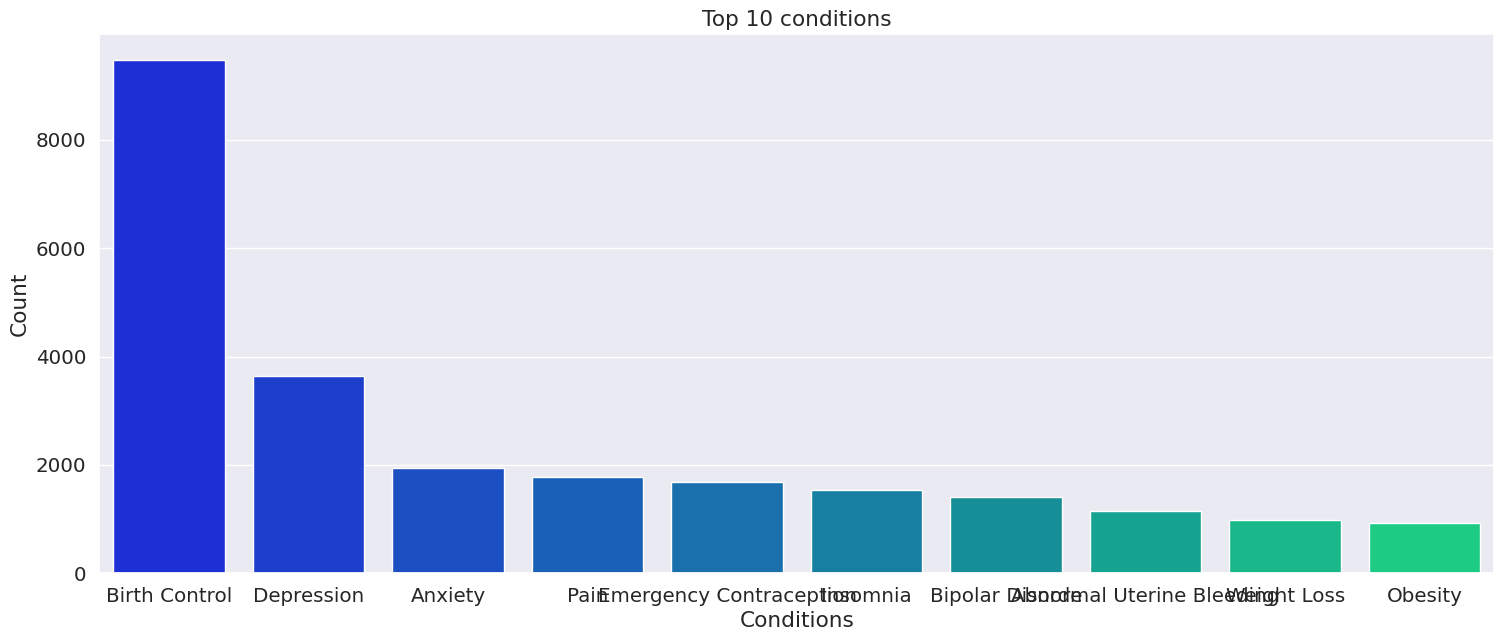

In [ ]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");


The is a bar graph which exhibits the top 10 conditions the people are suffering from. In this data set 'Birth Control' is the most prominent condition by a very big margin followed by Depression and Anxiety.

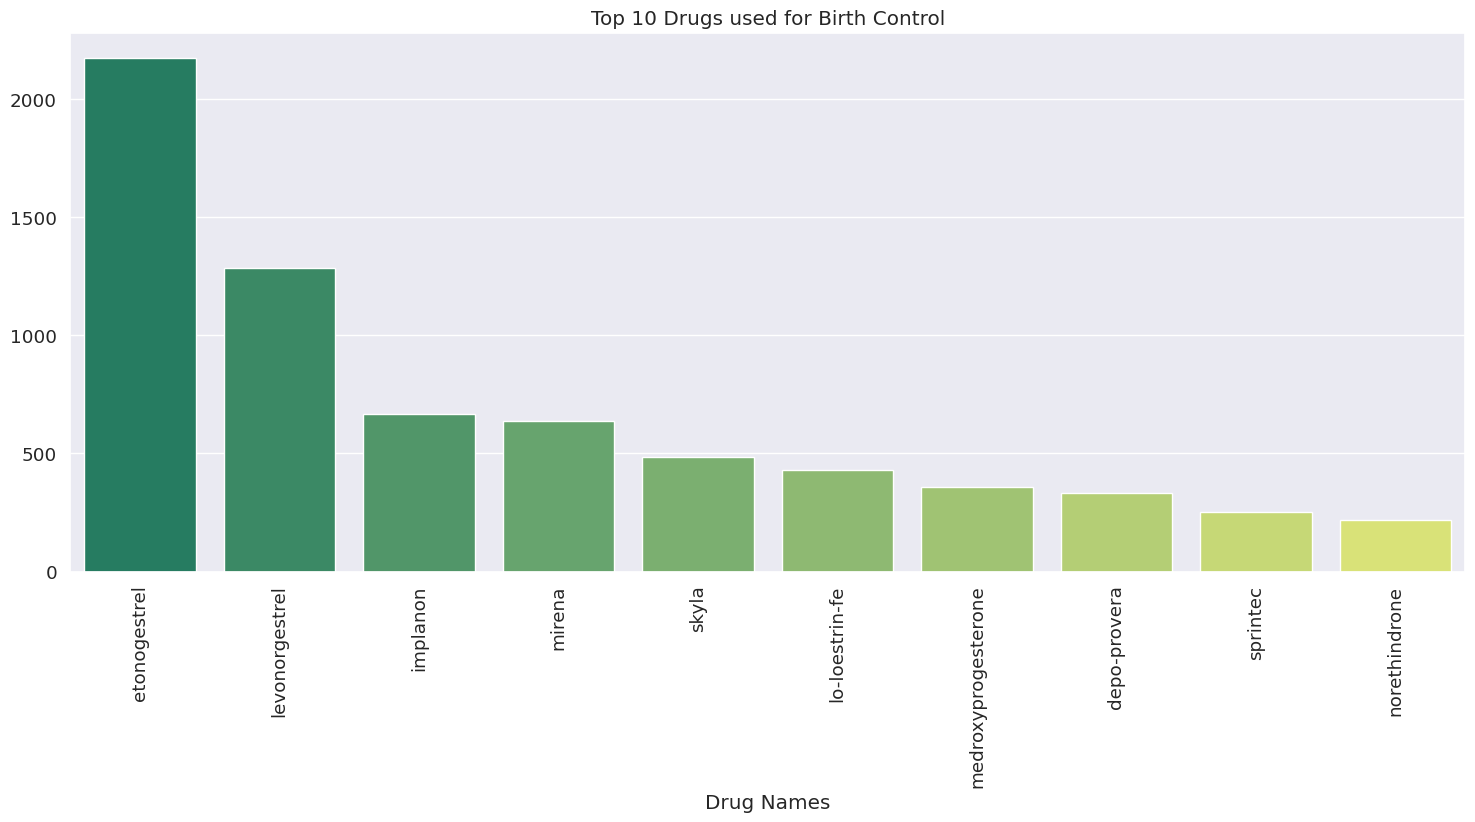

In [ ]:
# Top 10 drugs which are used for the top condition, that is Birth Control TBC
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

The is a bar graph which exhibits the top 10 drug names for the people suffering from Birth Control. In this data set 'Etonogestrel' is the most prominent drug by a very big margin.

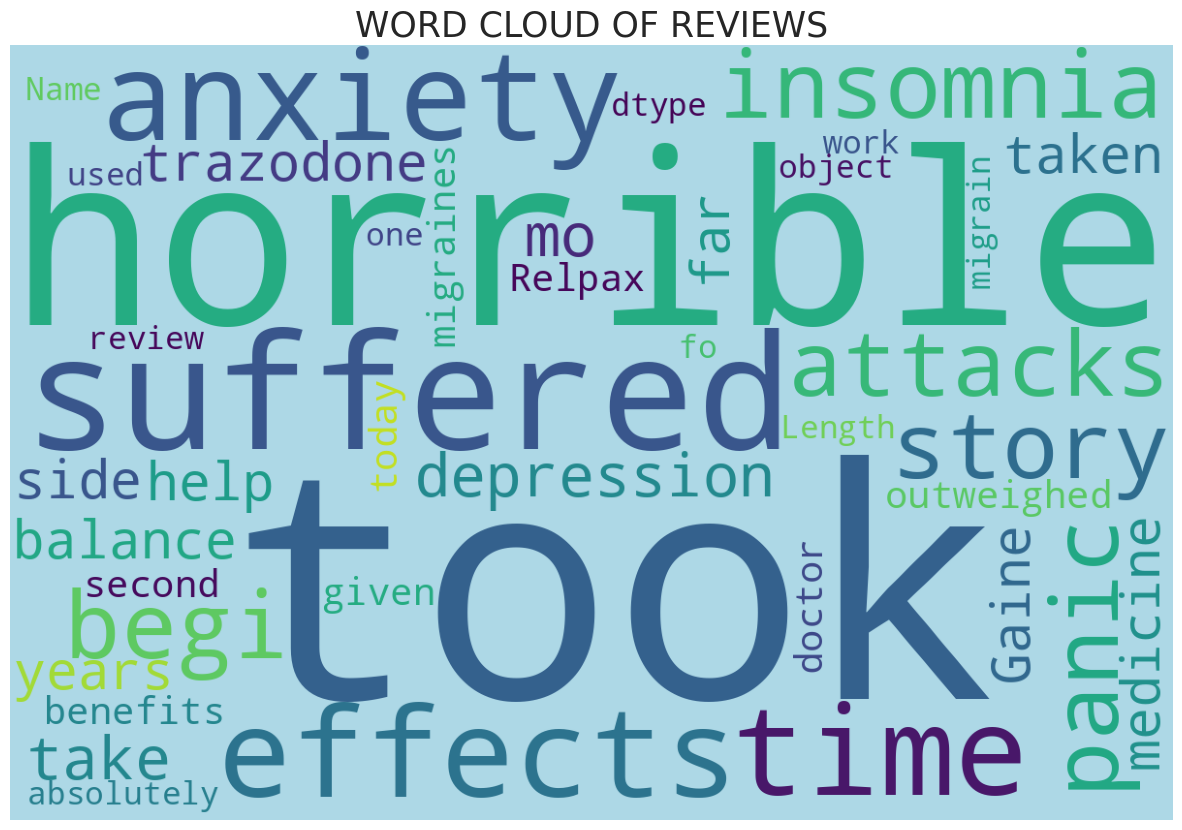

In [ ]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
data['positiveness'].value_counts()

 1    18047
-1    18047
Name: positiveness, dtype: int64

Non posso usare positiveness per capire la percentuale di review con rating positivo e negativo perchè positiveness è legata alla drugClass. Per ogni drugClass il # di positive review = # negative review.
Costruisco quindi una nuova colonna Review_Sentiment che è svincolata dalla drugClass e mi permette di differenziare le review con rating >= 9 e review con rating < 4.

In [ ]:
data.loc[(data['rating'] >= 9), 'Review_Sentiment'] = 1
data.loc[(data['rating'] <= 4), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    18047
0.0    18047
Name: Review_Sentiment, dtype: int64

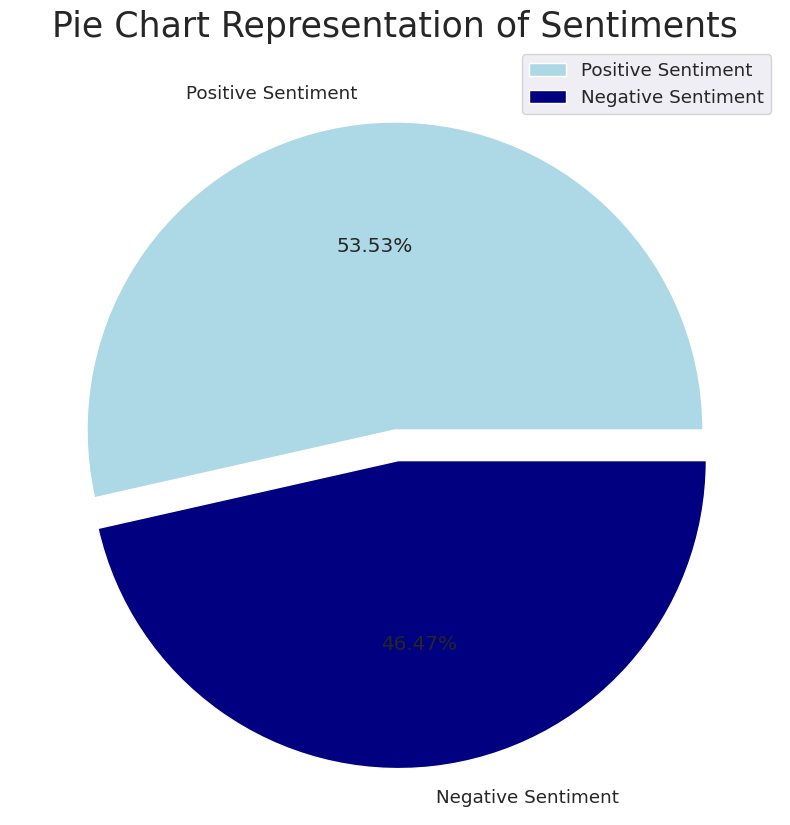

In [ ]:
# a pie chart to represent the sentiments of the patients

size = [18047, 15665]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

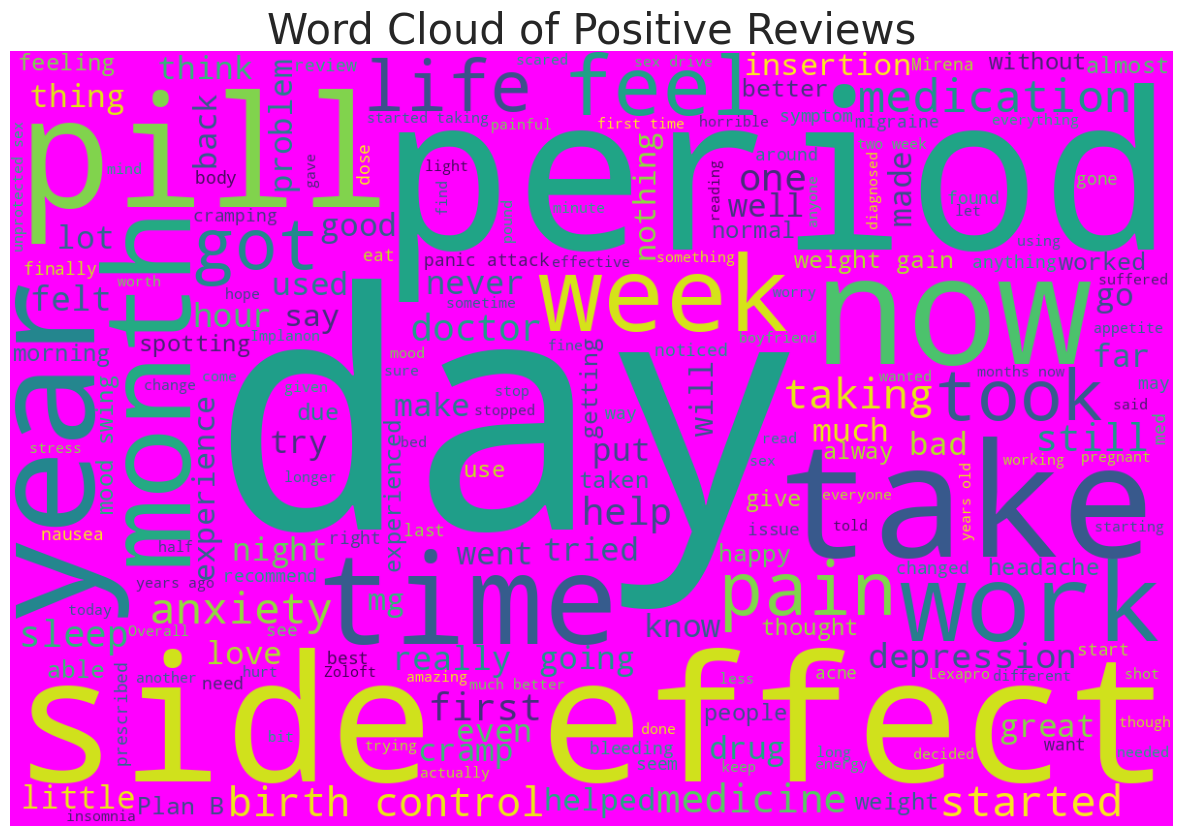

In [ ]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

This is a word cloud for the Positive Sentiments.

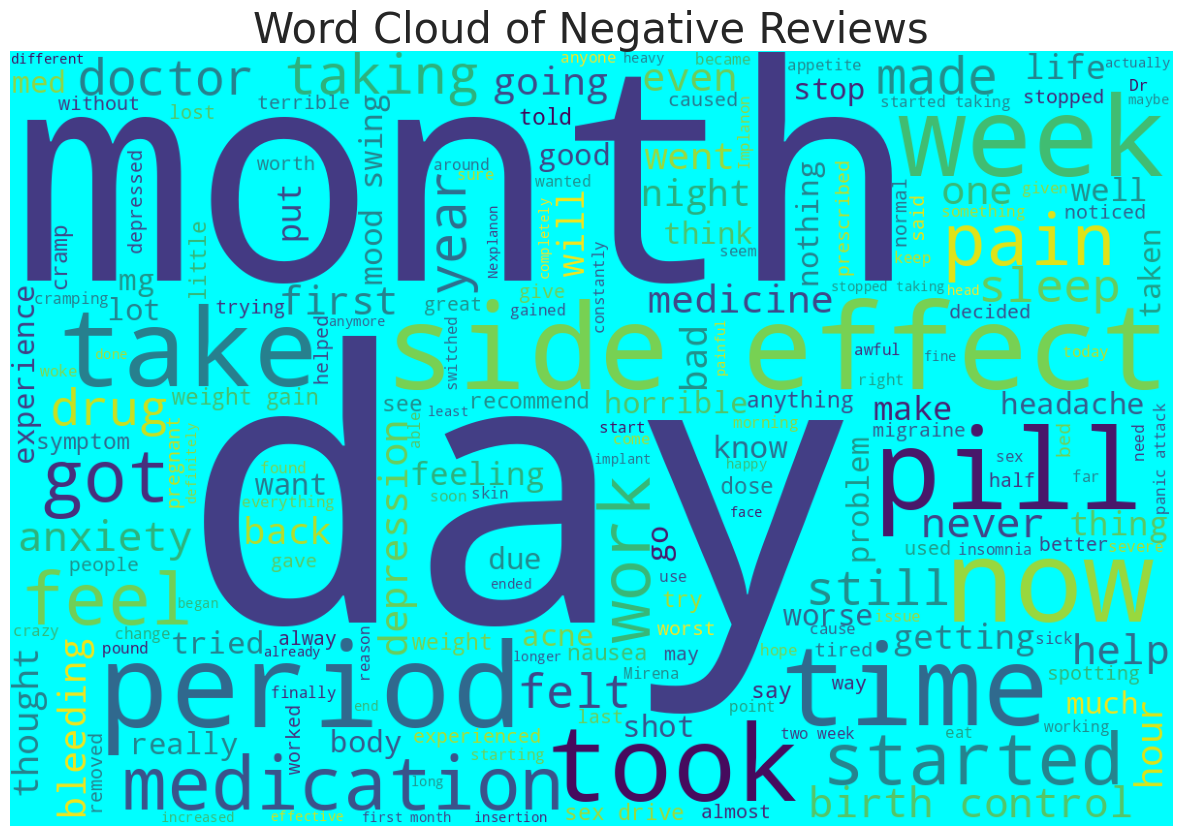

In [ ]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

This is a word cloud for the Negative Sentiments

In [ ]:
data.head()

drugName           condition  \
0    trazodone            Insomnia   
1  fluvoxamine  Anxiety and Stress   
2  mirtazapine             Anxiety   
3    trazodone          Depression   
4  mirtazapine             Anxiety   

                                              review  rating  \
0  "I have insomnia, it's horrible. My story begi...    10.0   
1  "I've suffered from panic attacks and anxiety ...     9.0   
2  "Suffered from anxiety and depression for 3 mo...    10.0   
3  "I take trazodone to help balance the effects ...    10.0   
4  "I have taken this medicine for 7 years. Gaine...    10.0   

               date  positiveness        drugClass  Review_Sentiment  
0     April 3, 2016             1  antidepressants               1.0  
1   January 3, 2011             1  antidepressants               1.0  
2      May 31, 2012             1  antidepressants               1.0  
3      June 1, 2016             1  antidepressants               1.0  
4  November 6, 2012             1  antidepressants               1.0

In [ ]:
import pandas as pd
# datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# extracting year from date
data['Year'] = data['date'].dt.year

# extracting the month from the date
data['month'] = data['date'].dt.month

# extracting the days from the date
data['day'] = data['date'].dt.day

Text(0.5, 0, 'Year')

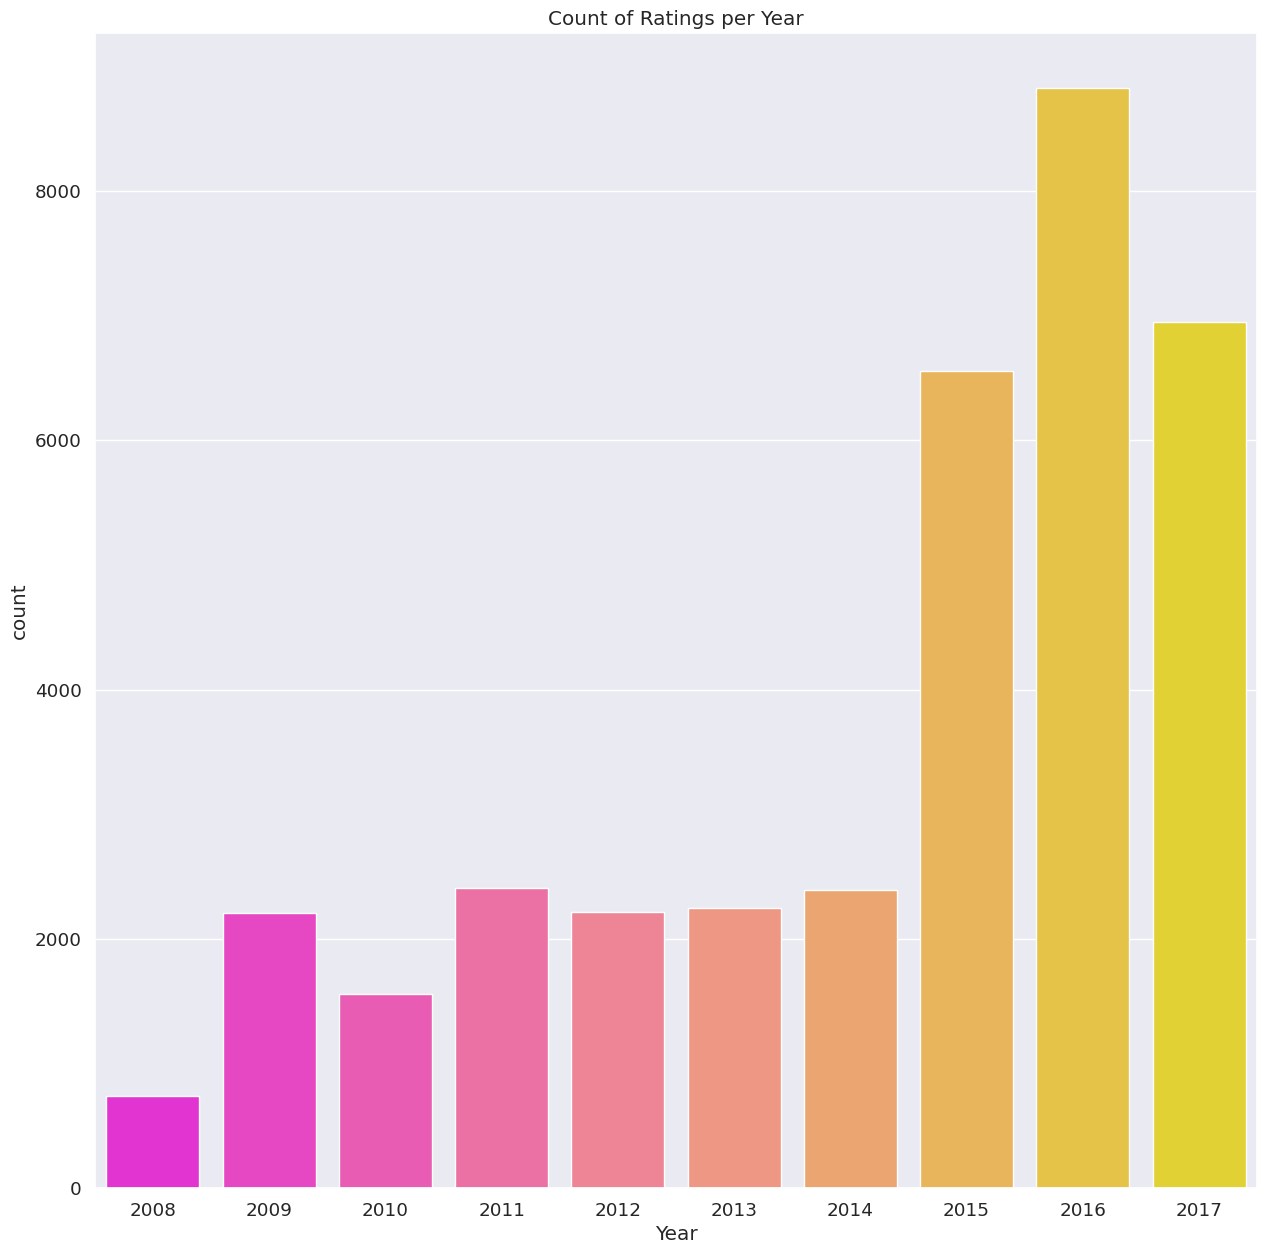

In [ ]:
s=sns.countplot(x=data["Year"], palette="spring")
s.set_title('Count of Ratings per Year')
s.set_xlabel("Year")


Text(0.5, 0, 'Month')

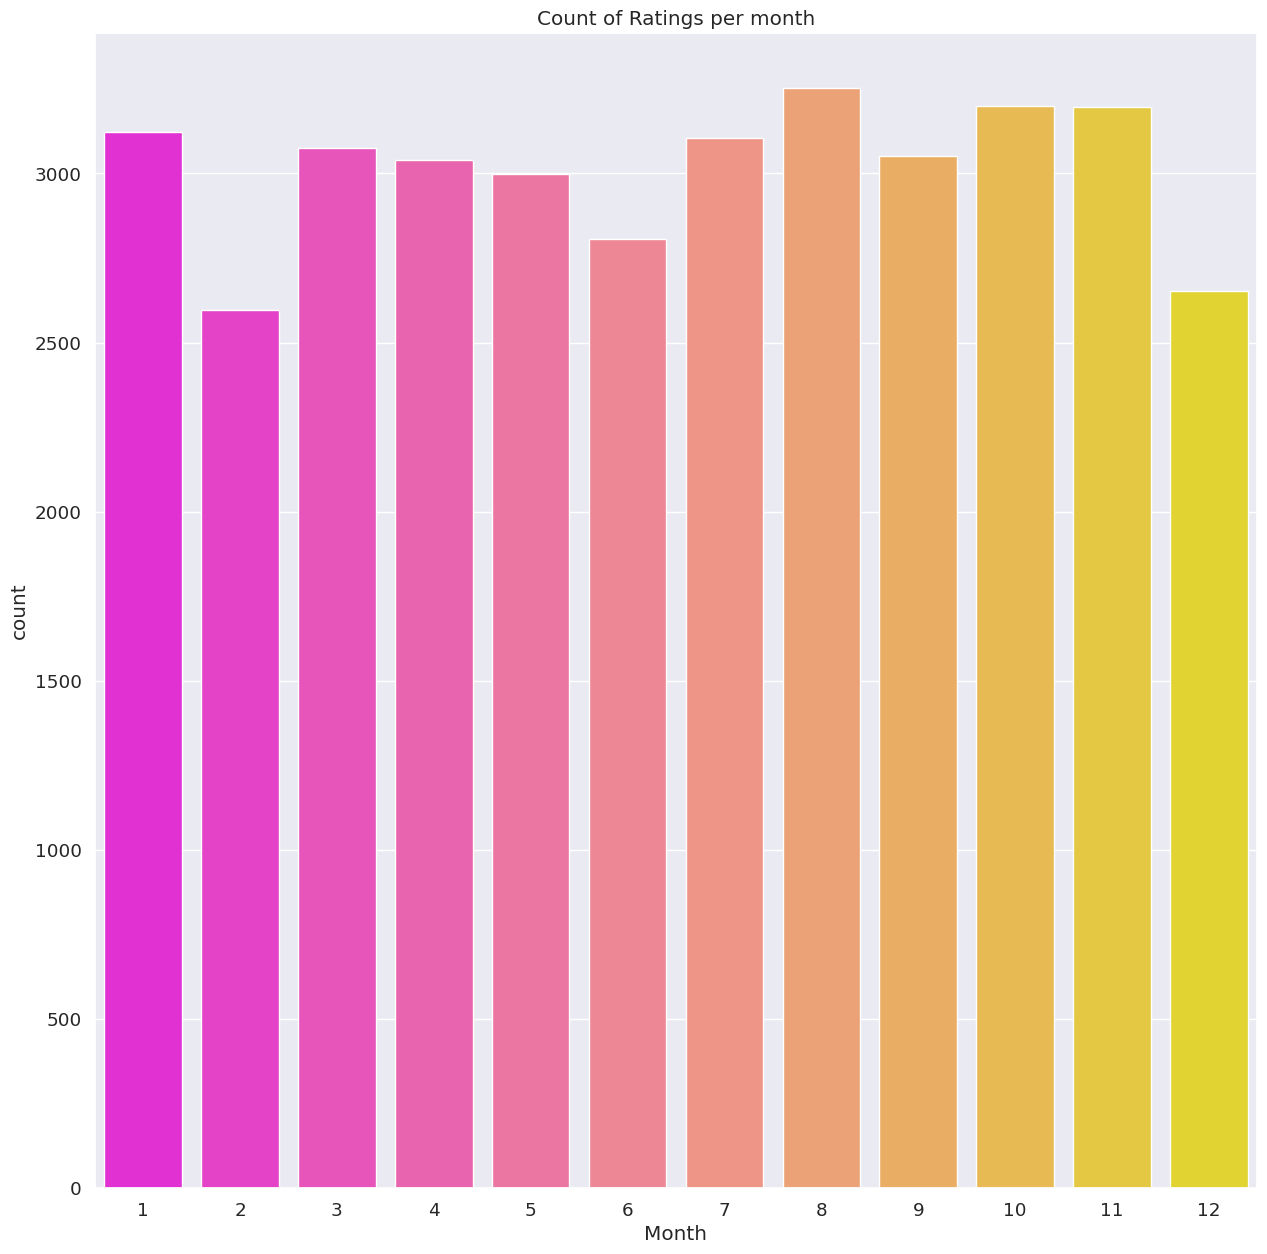

In [ ]:
# looking at the no. of reviews in each of the months

s=sns.countplot(x=data["month"], palette="spring")
s.set_title('Count of Ratings per month')
s.set_xlabel("Month")

Text(0.5, 0, 'Day')

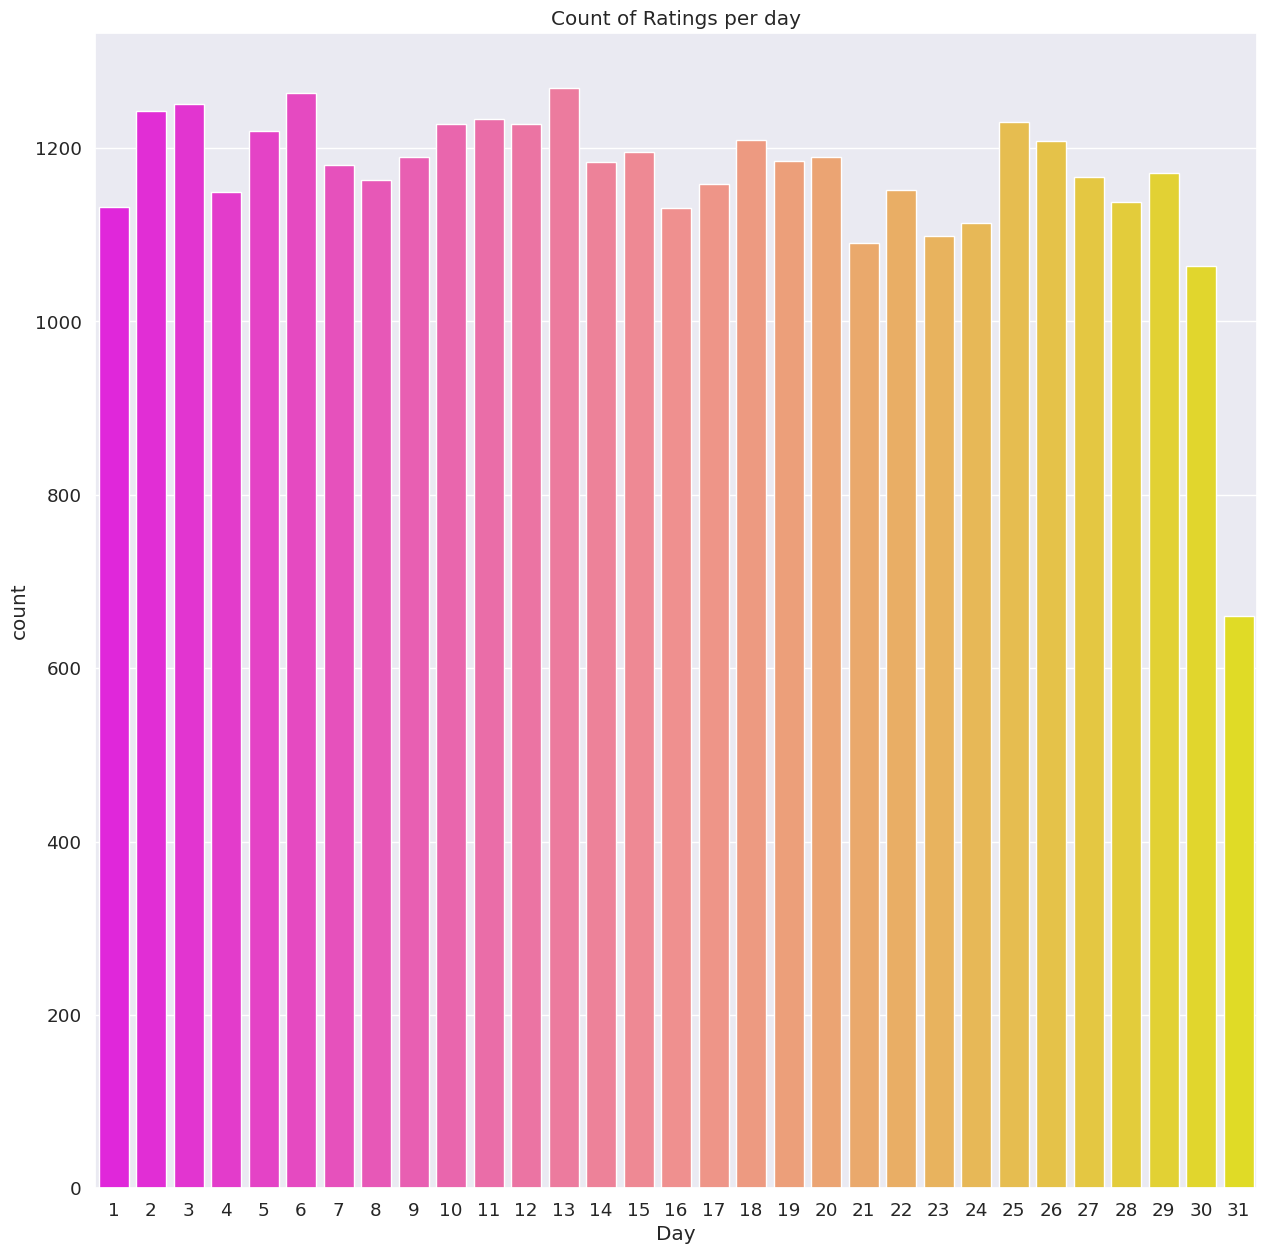

In [ ]:
 #looking at the no. of reviews in each of the day

s=sns.countplot(x=data["day"], palette="spring")
s.set_title('Count of Ratings per day')
s.set_xlabel("Day")

## Preprocessing

In [ ]:
# Import Text Mining libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from textblob import TextBlob
import gensim
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
# Define useful classes
%%capture
wordnet_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
###########
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [ ]:
data['review_clean'] = review_clean(data['review'])

In [ ]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [ ]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [ ]:
data.head()

drugName           condition  \
0    trazodone            Insomnia   
1  fluvoxamine  Anxiety and Stress   
2  mirtazapine             Anxiety   
3    trazodone          Depression   
4  mirtazapine             Anxiety   

                                              review  rating  \
0  "I have insomnia, it's horrible. My story begi...    10.0   
1  "I've suffered from panic attacks and anxiety ...     9.0   
2  "Suffered from anxiety and depression for 3 mo...    10.0   
3  "I take trazodone to help balance the effects ...    10.0   
4  "I have taken this medicine for 7 years. Gaine...    10.0   

               date  positiveness        drugClass  \
0     April 3, 2016             1  antidepressants   
1   January 3, 2011             1  antidepressants   
2      May 31, 2012             1  antidepressants   
3      June 1, 2016             1  antidepressants   
4  November 6, 2012             1  antidepressants   

                                        review_clean  
0  insomnia horribl stori begin pcp prescrib proz...  
1  suffer panic attack anxieti year took paxil ma...  
2  suffer anxieti depress 3 month 20 side effect ...  
3  take trazodon help balanc effect cymbalta slee...  
4  taken medicin 7 year gain lot weight weight wa...

In [ ]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [ ]:
data['sentiment'] = sentiment(data['review'])

In [ ]:
data['sentiment_clean'] = sentiment(data['review_clean'])

In [ ]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
data['review_clean_ss'] = review_clean(data['review'])
data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])

In [ ]:
data = data.dropna(how="any", axis=0)

In [ ]:
data['sentiment_clean']

0        0.061503
1        0.133333
2        0.109028
3        0.550000
4        0.333333
           ...   
36089   -0.093155
36090    0.031250
36091    0.000000
36092   -0.084222
36093   -0.350000
Name: sentiment_clean, Length: 36094, dtype: float64

In [ ]:
data['sentiment']

0        0.061503
1        0.080000
2        0.109028
3        0.550000
4        0.333333
           ...   
36089   -0.093155
36090    0.031250
36091    0.000000
36092   -0.084222
36093   -0.350000
Name: sentiment, Length: 36094, dtype: float64

In [ ]:
data.head()

drugName  condition                                             review  \
0       461         69  "I have insomnia, it's horrible. My story begi...   
1       181         11  "I've suffered from panic attacks and anxiety ...   
2       289         10  "Suffered from anxiety and depression for 3 mo...   
3       461         43  "I take trazodone to help balance the effects ...   
4       289         10  "I have taken this medicine for 7 years. Gaine...   

   rating       date  positiveness        drugClass  Review_Sentiment  Year  \
0    10.0 2016-04-03             1  antidepressants               1.0  2016   
1     9.0 2011-01-03             1  antidepressants               1.0  2011   
2    10.0 2012-05-31             1  antidepressants               1.0  2012   
3    10.0 2016-06-01             1  antidepressants               1.0  2016   
4    10.0 2012-11-06             1  antidepressants               1.0  2012   

   month  ...                                    review_clean_ss  \
0      4  ...  i have insomnia it s horrible my story begins ...   
1      1  ...  i ve suffered from panic attacks and anxiety f...   
2      5  ...  suffered from anxiety and depression for 3 mon...   
3      6  ...  i take trazodone to help balance the effects c...   
4     11  ...  i have taken this medicine for 7 years gained ...   

  sentiment_clean_ss  count_word  count_unique_word count_letters  \
0           0.061503         148                 90           726   
1           0.133333         135                 88           722   
2           0.109028         101                 76           526   
3           0.550000          40                 28           247   
4           0.333333          69                 59           355   

   count_punctuations  count_words_upper  count_words_title  count_stopwords  \
0                  27                 14                 22               78   
1                  27                  7                 15               64   
2                   9                  3                 11               41   
3                   7                  1                  6               17   
4                  11                  1                 11               22   

   mean_word_len  
0       3.912162  
1       4.355556  
2       4.217822  
3       5.200000  
4       4.159420  

[5 rows x 24 columns]

In [ ]:
#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [ ]:
data.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'positiveness',
       'drugClass', 'Review_Sentiment', 'Year', 'month', 'day', 'review_clean',
       'sentiment', 'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len'],
      dtype='object')

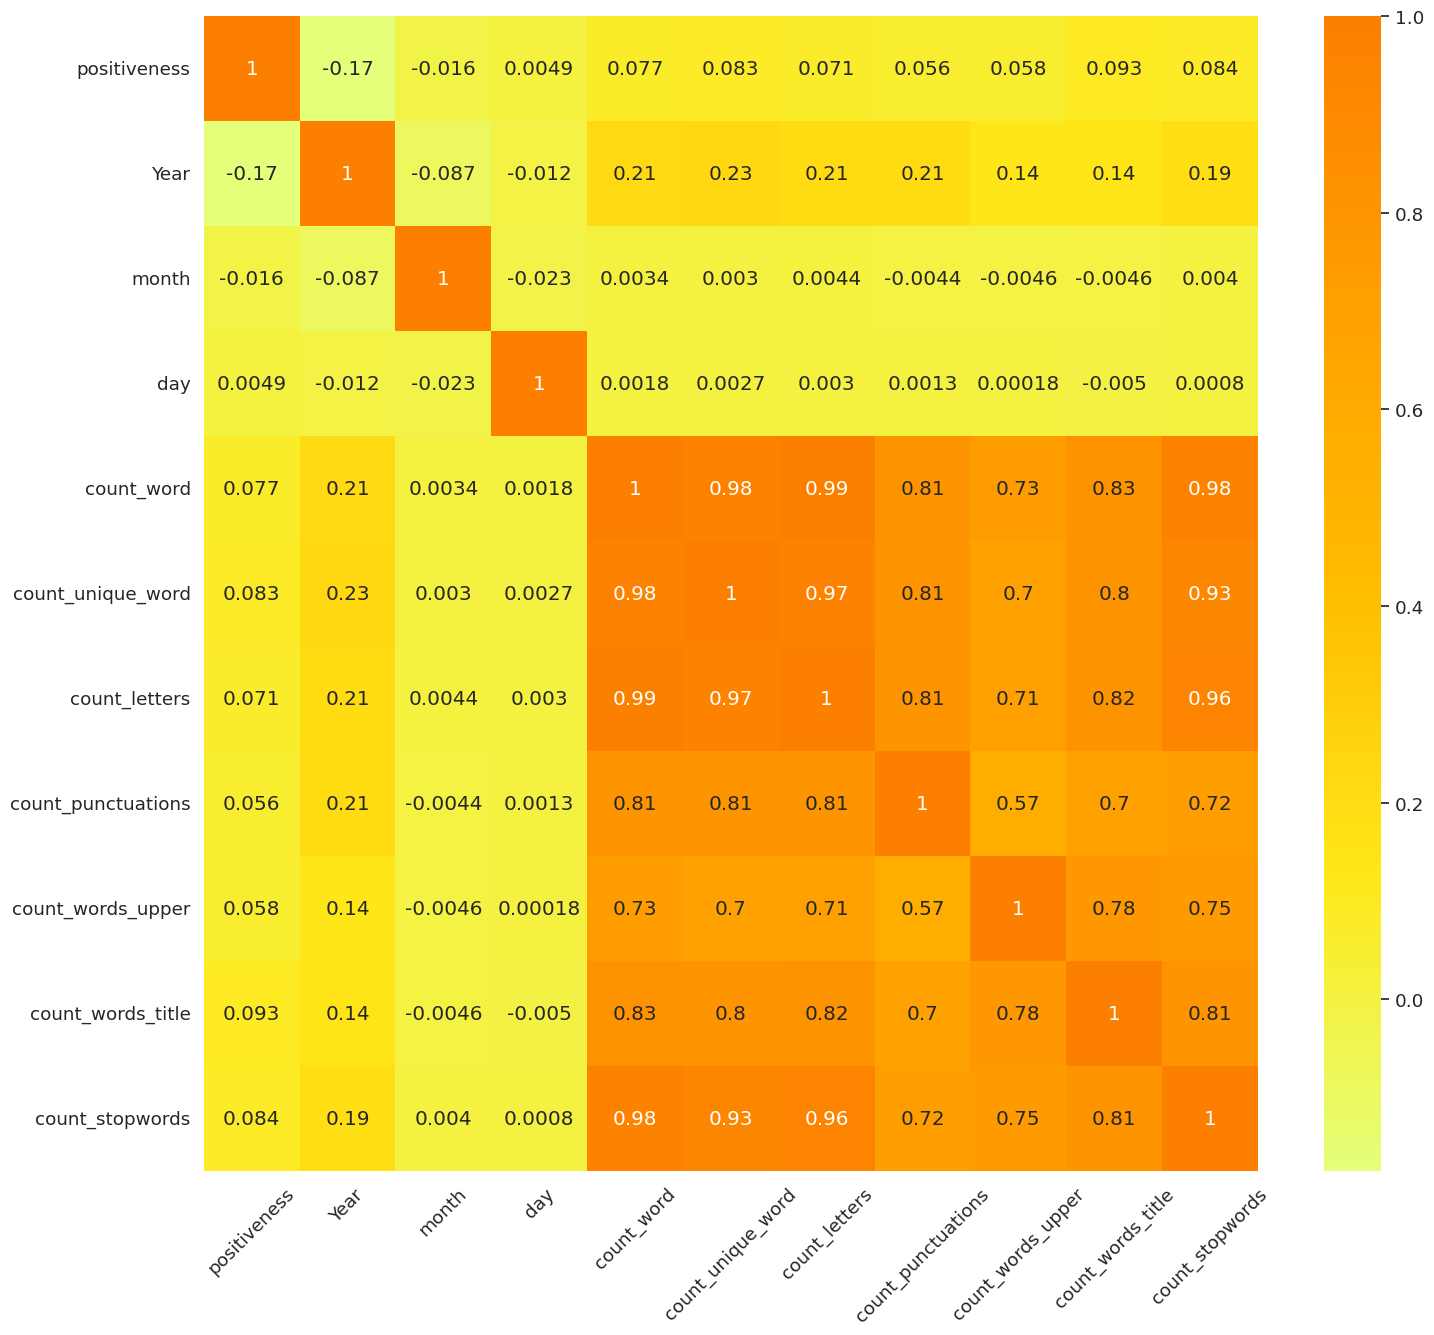

In [ ]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);


In [ ]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

The Label Encoder is used to change the categorical values of Drug Names and the conditions in to numerical values for the machine learning modelling. There are 3,667 unique drugs in the dataset that's why One hot encoder is not used as it would generate 3,667 new features and it would be very computationally expensive.

LightGBM is a gradient boosting framework that uses treebased learning algorithms. It's designed to be distributed and efficient. It has many advantages like faster training speed and higher efficiency, lower memory usage, better accuracy and support of parallel and GPU learning, since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit.

In [ ]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
data.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'positiveness',
       'drugClass', 'Review_Sentiment', 'Year', 'month', 'day', 'review_clean',
       'sentiment', 'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len'],
      dtype='object')

In [ ]:
# Defining Features and splitting the data as train and test set

features = data[['condition','sentiment', 'day', 'month', 'Year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
#print ("The Train set size ", X_train.shape)
#print ("The Test set size ", X_test.shape)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
data['Review_Sentiment']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
36089    0.0
36090    0.0
36091    0.0
36092    0.0
36093    0.0
Name: Review_Sentiment, Length: 36094, dtype: float64

In [ ]:
target

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
36089    0.0
36090    0.0
36091    0.0
36092    0.0
36093    0.0
Name: Review_Sentiment, Length: 36094, dtype: float64

In [ ]:
# Training Model - I
g = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = g.fit(X_train, y_train)


In [ ]:
# Predictions

# predictions = model.predict(X_test)
# print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
# print ("The confusion Matrix is ")
# confusion_matrix(y_test, predictions)

predictions = model.predict(X_test)
print ("The Accuracy of the model on testing data is : ", accuracy_score(y_test, predictions), '\n')
predictions_lgbm = model.predict(X_train)
print ("The Accuracy of the model on training data is : ", accuracy_score(y_train, predictions_lgbm), '\n')
print ("The confusion Matrix is \n")
confusion_matrix(y_test, predictions)

The Accuracy of the model on testing data is :  0.7901371381077712 

The Accuracy of the model on training data is :  1.0 

The confusion Matrix is 



array([[2951,  701],
       [ 814, 2753]])

per rendere accuracy più alta > aggiungere features (ex: giorno, mese, anno ???)
FATTO


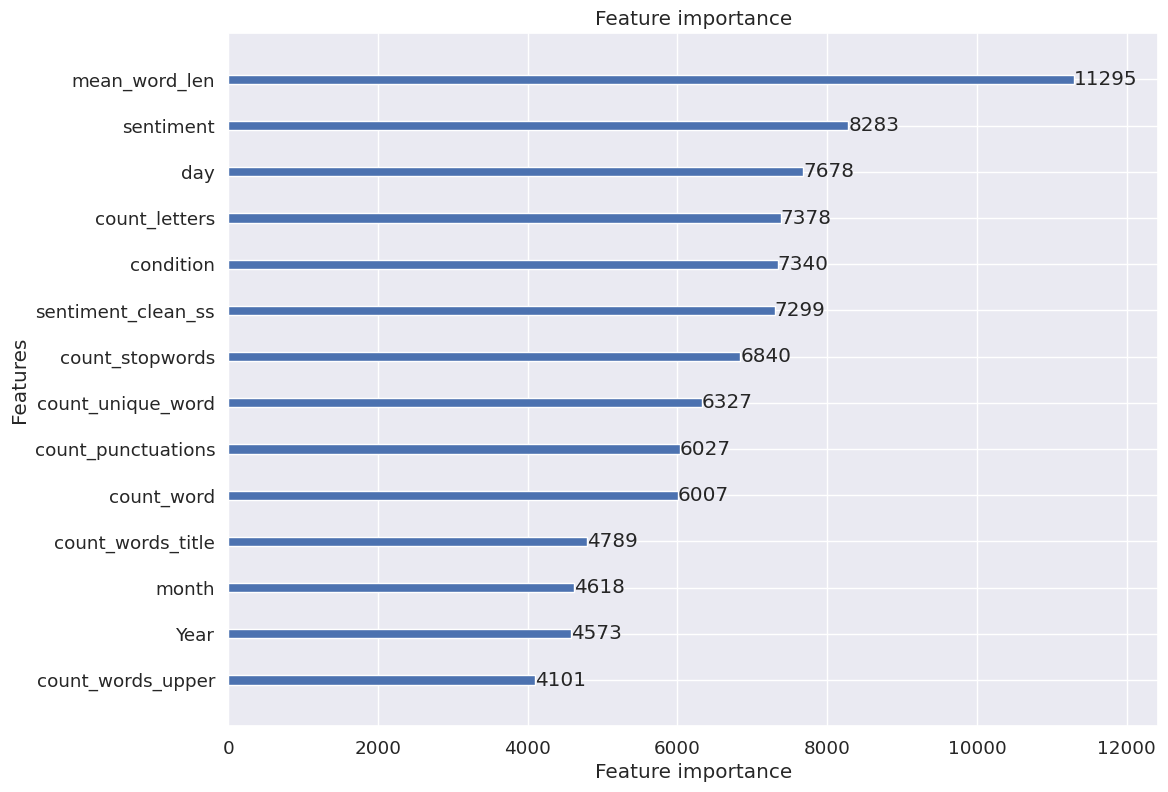

In [ ]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model);

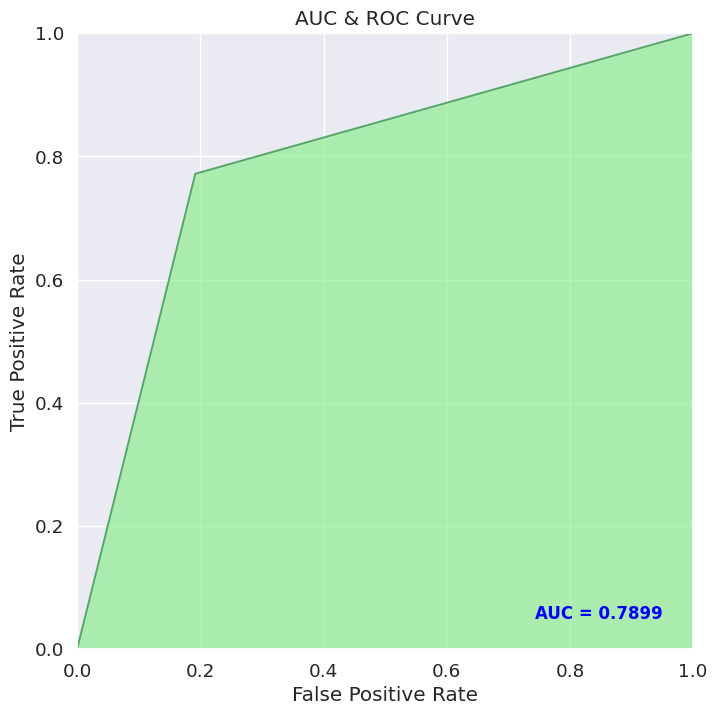

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predictions)
#roc_auc_score(y_score=np_pred, y_true=np_label, multi_class="ovr",average=None)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
#Support Vector Machine (SVM)


from sklearn.svm import SVC
     

model_svc=SVC()
model_svm=model_svc.fit(X_train,y_train)
     

# Predictions
predictions_4 = model_svm.predict(X_test)
print ("The Accuracy of the model on testing data is : ", accuracy_score(y_test, predictions_4), '\n')
predictions_41 = model_svm.predict(X_train)
print ("The Accuracy of the model on training data is : ", accuracy_score(y_train, predictions_41), '\n')
print ("The confusion Matrix is \n")
print (confusion_matrix(y_test, predictions_4), '\n')
     

predictions_41 = model_svm.predict(X_train)
#print ("The Accuracy of the model on training data is : ", accuracy_score(y_train, predictions_4), '\n')

The Accuracy of the model on testing data is :  0.532345200166228 

The Accuracy of the model on training data is :  0.5361731601731602 

The confusion Matrix is 

[[1888 1764]
 [1612 1955]] 



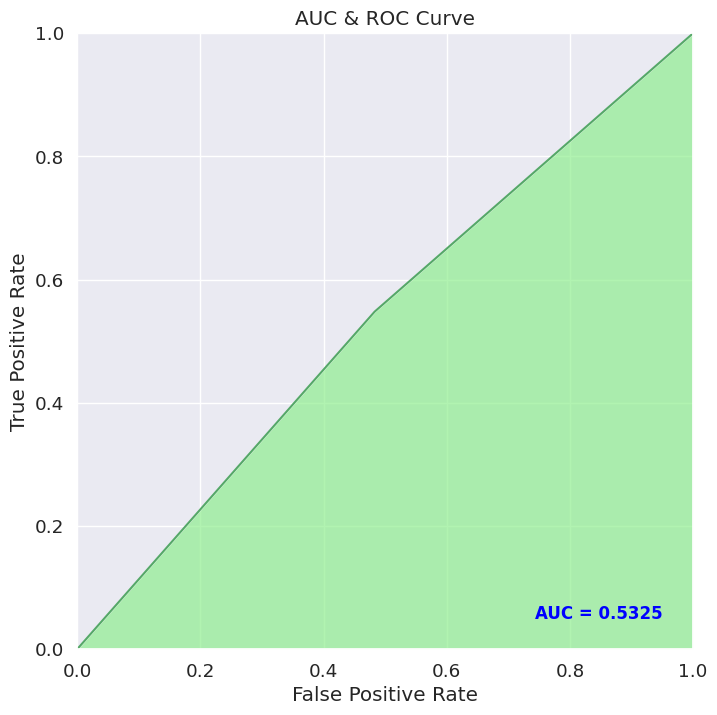

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predictions_4)
#roc_auc_score(y_score=np_pred, y_true=np_label, multi_class="ovr",average=None)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions_4)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
#Model-V LogisticRegression


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
LR = LogisticRegression(solver="liblinear").fit(X_train, y_train)
predictions_5 = LR.predict(X_test)
roc_auc = roc_auc_score(y_test,predictions, multi_class='ovr')
print(roc_auc) 
confusion_matrix(y_test, predictions_5)


0.7899237058333495


array([[2376, 1276],
       [1063, 2504]])

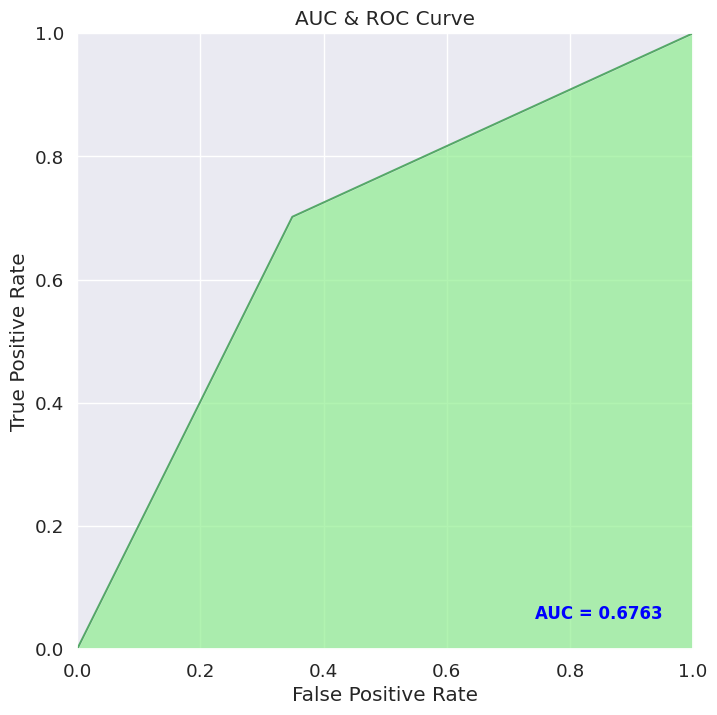

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predictions_5)
#roc_auc_score(y_score=np_pred, y_true=np_label, multi_class="ovr",average=None)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions_5)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

[07:57:11] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator", "num_leaves" } are not used.

The Accuracy of the model on testing data is :  0.7308491480814517 

The Accuracy of the model on training data is :  0.7724675324675324 

The confusion Matrix is 

[[2605 1047]
 [ 896 2671]] 

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.73      3652
         1.0       0.72      0.75      0.73      3567

    accuracy                           0.73      7219
   macro avg       0.73      0.73      0.73      7219
weighted avg       0.73      0.73      0.73      7219



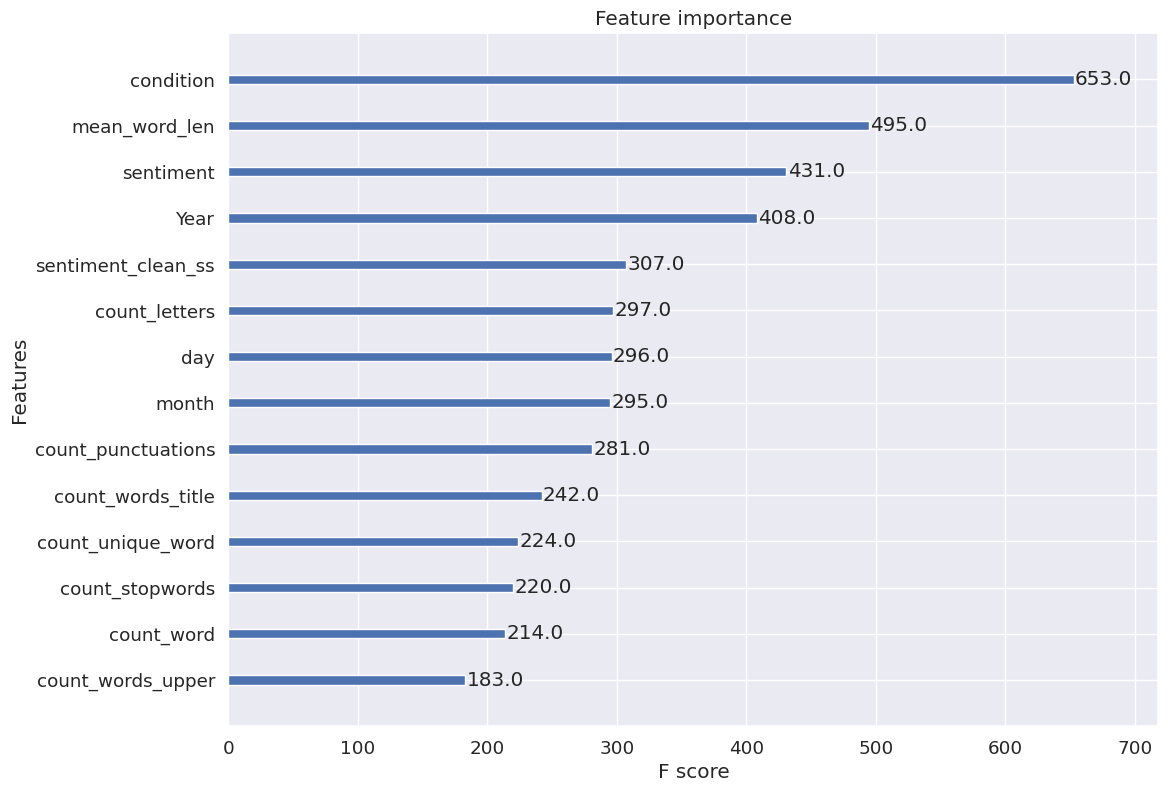

In [ ]:
#Model - II XGBClassifier

xgb_clf = XGBClassifier(n_estimator = 10000,
                    learning_rate=0.10,
                    num_leaves=30)

model_xgb = xgb_clf.fit(X_train, y_train)

# Predictions
predictions_2 = model_xgb.predict(X_test)
print ("The Accuracy of the model on testing data is : ", accuracy_score(y_test, predictions_2), '\n')
predictions_21 = model_xgb.predict(X_train)
print ("The Accuracy of the model on training data is : ", accuracy_score(y_train, predictions_21), '\n')
print ("The confusion Matrix is \n")
print (confusion_matrix(y_test, predictions_2), '\n')
     

#print ("**********TRAINING SCORE********** : '\n'"classification_report(y_train, predictions_2),'\n')
#print ("**********TESTING SCORE********** : '\n'"classification_report(y_test, predictions_2))
print (classification_report(y_test, predictions_2))
     

# Feature Importance Plot using XGBClassifier
from xgboost import plot_importance # plot_importance for xgboost
plt.rcParams['figure.figsize'] = [12, 9]
plot_importance(model_xgb);

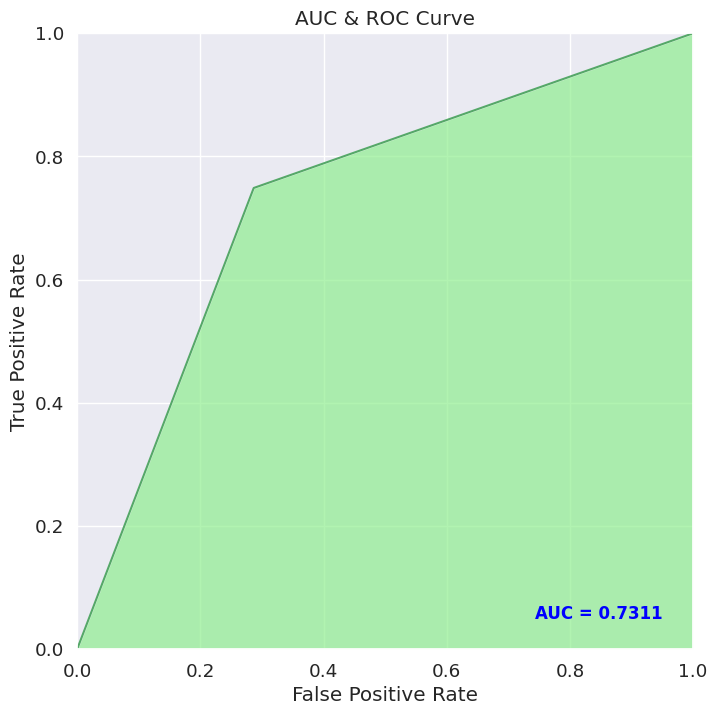

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predictions_2)
#roc_auc_score(y_score=np_pred, y_true=np_label, multi_class="ovr",average=None)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions_2)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
#Model - III CatBoostClassifier TBC
!pip install catboost
from catboost import CatBoostClassifier


# Training Model - III

cat_clf = CatBoostClassifier(iterations = 100,
                            learning_rate = 0.5);

model_cat = cat_clf.fit(X_train, y_train);
     

# Predictions
predictions_3 = model_cat.predict(X_test)
print ("The Accuracy of the model on testing data is : ", accuracy_score(y_test, predictions_3), '\n')

predictions_31 = model_cat.predict(X_train)
print ("The Accuracy of the model on training data is : ", accuracy_score(y_train, predictions_31), '\n')
print ("The confusion Matrix is \n")
print (confusion_matrix(y_test, predictions_3), '\n')

print (classification_report(y_test, predictions_3))
     

#print ("**********TRAINING SCORE********** : '\n'"classification_report(y_test, predictions),'\n')
#print ("**********TESTING SCORE********** : '\n'"classification_report(y_test, predictions_3))
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.8 MB/s eta 0:00:00
0:	learn: 0.6241094	total: 55.4ms	remaining: 5.48s
1:	learn: 0.5923468	total: 63.3ms	remaining: 3.1s
2:	learn: 0.5789831	total: 69.4ms	remaining: 2.24s
3:	learn: 0.5710491	total: 77.3ms	remaining: 1.85s
4:	learn: 0.5647045	total: 86.1ms	remaining: 1.64s
5:	learn: 0.5594609	total: 97.8ms	remaining: 1.53s
6:	learn: 0.5561709	total: 114ms	remaining: 1.51s
7:	learn: 0.5549832	total: 124ms	remaining: 1.42s
8:	learn: 0.5514707	total: 130ms	remaining: 1.32s
9:	learn: 0.5499226	total: 137ms	remaining: 1.23s
10:	learn: 0.5471343	total: 143ms	remaining: 1.16s
11:	learn: 0.5460524	total: 150ms	remaining: 1.1s
12:	learn: 0.5442729	total: 158ms	remaining: 1.05s
13:	learn: 0.5432403	total: 165ms	remaining: 1.01s
14:	learn: 0.5426683	total: 171ms	remaining: 972ms
15:	learn: 0.5413615	total: 178ms	remaining: 935ms
16:	learn: 

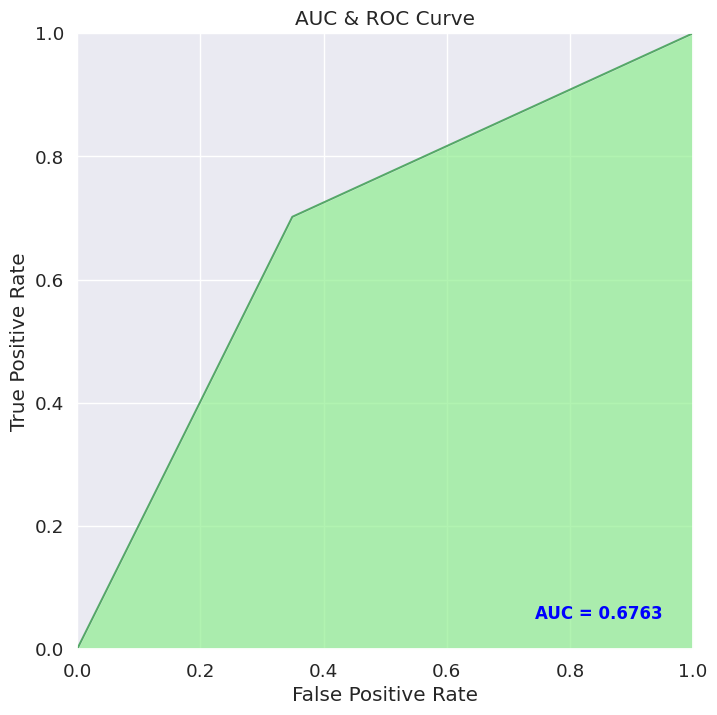

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predictions_5)
#roc_auc_score(y_score=np_pred, y_true=np_label, multi_class="ovr",average=None)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions_5)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
#Model-5 Naive Bayes Classifier


# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
model_gnb=gnb.fit(X_train, y_train)
     

predictions_55 = model_gnb.predict(X_test)
print ("The Accuracy of the testing model is : ", accuracy_score(y_test, predictions_55), '\n')
predictions_51 = model_gnb.predict(X_train)
print ("The Accuracy of the model on training data is : ", accuracy_score(y_train, predictions_51), '\n')
print ("The confusion Matrix is \n")
print (confusion_matrix(y_test, predictions_5), '\n')

print (classification_report(y_test, predictions_5))
     

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predictions_5)))

The Accuracy of the testing model is :  0.6675439811608256 

The Accuracy of the model on training data is :  0.6714112554112555 

The confusion Matrix is 

[[2073 1579]
 [ 821 2746]] 

              precision    recall  f1-score   support

         0.0       0.72      0.57      0.63      3652
         1.0       0.63      0.77      0.70      3567

    accuracy                           0.67      7219
   macro avg       0.68      0.67      0.66      7219
weighted avg       0.68      0.67      0.66      7219

Model accuracy score: 0.6675


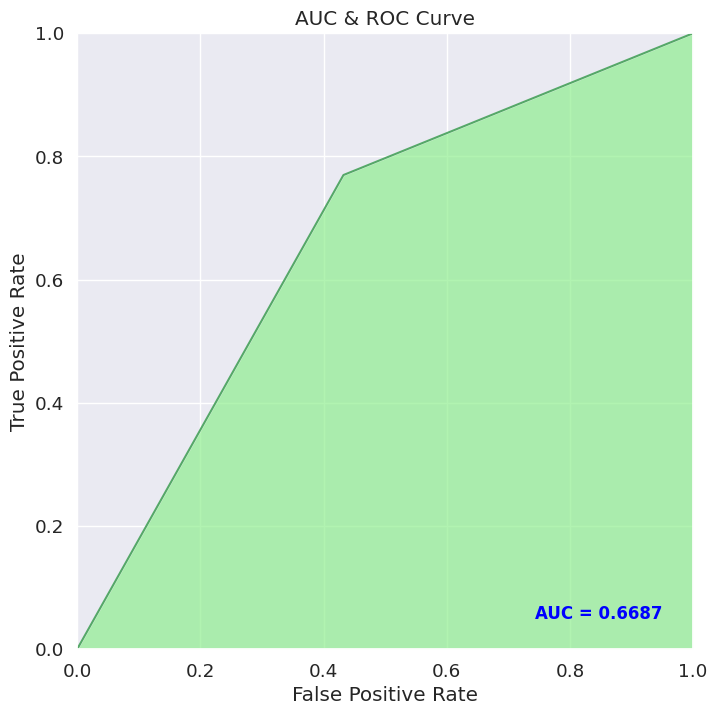

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predictions_55)
#roc_auc_score(y_score=np_pred, y_true=np_label, multi_class="ovr",average=None)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions_55)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Sentiment with NLP
Natural language processing (NLP) for sentiment analysis is the process of using computational techniques to automatically determine the sentiment or emotion expressed in written or spoken language. Sentiment analysis can be used to analyze customer feedback, social media posts, reviews, and other forms of text data to determine the overall sentiment towards a product, brand, or topic.

NLP techniques for sentiment analysis typically involve preprocessing the text data by tokenizing the text into individual words or phrases, removing stop words and punctuation, and normalizing the text (e.g., converting all words to lowercase). The sentiment of each word or phrase is then analyzed using various methods, such as lexicon-based methods that use a dictionary of words with pre-assigned sentiment scores or machine learning-based methods that learn to predict sentiment from labeled examples.

The output of sentiment analysis is typically a numerical score or a label indicating the overall sentiment of the text (e.g., positive, negative, or neutral). This information can be used to monitor customer feedback, improve products and services, and make informed decisions based on the sentiment expressed in the text data.

NLP for sentiment analysis is a rapidly growing field, and new techniques and tools are constantly being developed to improve the accuracy and efficiency of sentiment analysis 

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


In [ ]:
import pandas as pd
nltk.download('vader_lexicon')  # Download the sentiment lexicon used by the analyzer
analyzer = SentimentIntensityAnalyzer() #Instantiate the sentiment analyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#Define a function to calculate the sentiment score for each review
def get_sentiment_score(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

In [ ]:
#Apply the function to the review column of the dataframe to get the sentiment score for each review
data['sentiment_score'] = data['review'].apply(get_sentiment_score)


In [ ]:
#Use the sentiment score to classify the review as positive, negative, or neutral:
def classify_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

data['sentiment'] = data['sentiment_score'].apply(classify_sentiment)


In [ ]:
#You can now analyze the sentiment of the drug reviews by grouping the data by drug name or other relevant columns:
drug_sentiment = data.groupby('drugName')['sentiment'].value_counts(normalize=True)


In [ ]:
print(drug_sentiment)

drugName          sentiment
abilify           Negative     0.533040
                  Positive     0.400881
                  Neutral      0.066079
abilify-maintena  Negative     0.333333
                  Neutral      0.333333
                                 ...   
zyprexa           Positive     0.426966
                  Neutral      0.101124
zyprexa-zydis     Neutral      0.500000
                  Negative     0.333333
                  Positive     0.166667
Name: sentiment, Length: 1268, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drug_sentiment = drug_sentiment.unstack().fillna(0)


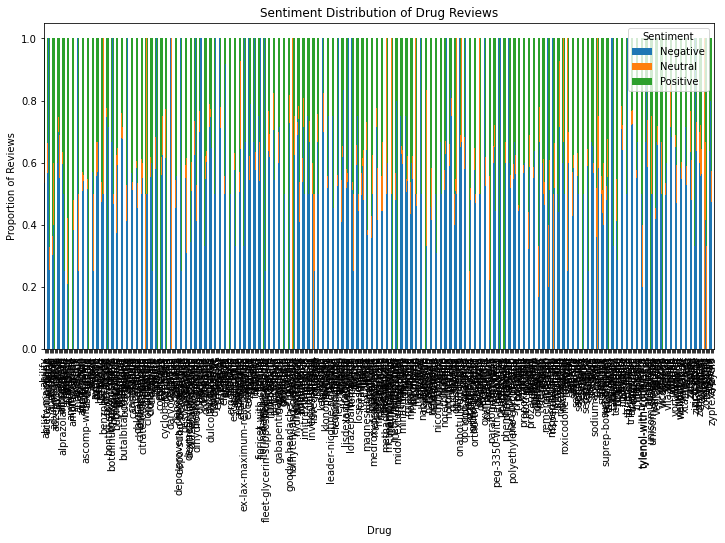

In [ ]:
drug_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Sentiment Distribution of Drug Reviews")
plt.xlabel("Drug")
plt.ylabel("Proportion of Reviews")
plt.legend(title="Sentiment", loc='upper right', labels=["Negative", "Neutral", "Positive"])
plt.show()


This will generate a stacked bar plot showing the proportion of negative, neutral, and positive reviews for each drug in the dataset.

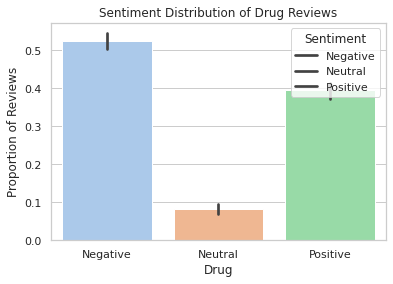

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(data=drug_sentiment, palette="pastel")
ax.set_title("Sentiment Distribution of Drug Reviews")
ax.set_xlabel("Drug")
ax.set_ylabel("Proportion of Reviews")
ax.legend(title="Sentiment", loc='upper right', labels=["Negative", "Neutral", "Positive"])
plt.show()

This will generate a grouped bar plot showing the same information as the stacked bar plot, but with separate bars for each sentiment category.

# Sentiment with VADER

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
a = 'This was a good movie.'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [ ]:
data.head()

drugName           condition  \
0    trazodone            Insomnia   
1  fluvoxamine  Anxiety and Stress   
2  mirtazapine             Anxiety   
3    trazodone          Depression   
4  mirtazapine             Anxiety   

                                              review  rating  \
0  "I have insomnia, it's horrible. My story begi...    10.0   
1  "I've suffered from panic attacks and anxiety ...     9.0   
2  "Suffered from anxiety and depression for 3 mo...    10.0   
3  "I take trazodone to help balance the effects ...    10.0   
4  "I have taken this medicine for 7 years. Gaine...    10.0   

               date  positiveness        drugClass  
0     April 3, 2016             1  antidepressants  
1   January 3, 2011             1  antidepressants  
2      May 31, 2012             1  antidepressants  
3      June 1, 2016             1  antidepressants  
4  November 6, 2012             1  antidepressants

In [ ]:
data['positiveness'].value_counts()

 1    18047
-1    18047
Name: positiveness, dtype: int64

In [ ]:
data['scores'] = data['review'].apply(lambda review: sid.polarity_scores(review))

data.head()

drugName           condition  \
0    trazodone            Insomnia   
1  fluvoxamine  Anxiety and Stress   
2  mirtazapine             Anxiety   
3    trazodone          Depression   
4  mirtazapine             Anxiety   

                                              review  rating  \
0  "I have insomnia, it's horrible. My story begi...    10.0   
1  "I've suffered from panic attacks and anxiety ...     9.0   
2  "Suffered from anxiety and depression for 3 mo...    10.0   
3  "I take trazodone to help balance the effects ...    10.0   
4  "I have taken this medicine for 7 years. Gaine...    10.0   

               date  positiveness        drugClass  \
0     April 3, 2016             1  antidepressants   
1   January 3, 2011             1  antidepressants   
2      May 31, 2012             1  antidepressants   
3      June 1, 2016             1  antidepressants   
4  November 6, 2012             1  antidepressants   

                                              scores  
0  {'neg': 0.055, 'neu': 0.865, 'pos': 0.08, 'com...  
1  {'neg': 0.206, 'neu': 0.71, 'pos': 0.084, 'com...  
2  {'neg': 0.168, 'neu': 0.702, 'pos': 0.13, 'com...  
3  {'neg': 0.073, 'neu': 0.694, 'pos': 0.232, 'co...  
4  {'neg': 0.098, 'neu': 0.741, 'pos': 0.161, 'co...

In [ ]:
data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])

data.head()

drugName           condition  \
0    trazodone            Insomnia   
1  fluvoxamine  Anxiety and Stress   
2  mirtazapine             Anxiety   
3    trazodone          Depression   
4  mirtazapine             Anxiety   

                                              review  rating  \
0  "I have insomnia, it's horrible. My story begi...    10.0   
1  "I've suffered from panic attacks and anxiety ...     9.0   
2  "Suffered from anxiety and depression for 3 mo...    10.0   
3  "I take trazodone to help balance the effects ...    10.0   
4  "I have taken this medicine for 7 years. Gaine...    10.0   

               date  positiveness        drugClass  \
0     April 3, 2016             1  antidepressants   
1   January 3, 2011             1  antidepressants   
2      May 31, 2012             1  antidepressants   
3      June 1, 2016             1  antidepressants   
4  November 6, 2012             1  antidepressants   

                                              scores  compound  
0  {'neg': 0.055, 'neu': 0.865, 'pos': 0.08, 'com...    0.7579  
1  {'neg': 0.206, 'neu': 0.71, 'pos': 0.084, 'com...   -0.9501  
2  {'neg': 0.168, 'neu': 0.702, 'pos': 0.13, 'com...   -0.3506  
3  {'neg': 0.073, 'neu': 0.694, 'pos': 0.232, 'co...    0.7906  
4  {'neg': 0.098, 'neu': 0.741, 'pos': 0.161, 'co...    0.7316

# Sentiment with VADER (and preprocessing step before)

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 9.6 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
# polarity_scores method of SentimentIntensityAnalyzer
# oject gives a sentiment dictionary.
# which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Sentence Overall Rated As", end = " ")
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")

This function will make a sentence positive if the value of the text will be more than or equal to 0.05. It will make the text negative if the value of the text will be less than or equal to -0.05, else it will make the sentence neutral.

In [ ]:
data['sentiment_score'] = data['review'].apply(sentiment_scores)

Output streaming troncato alle ultime 5000 righe.
sentence was rated as  82.3 % Neutral
sentence was rated as  11.600000000000001 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.8047}
sentence was rated as  0.0 % Negative
sentence was rated as  82.5 % Neutral
sentence was rated as  17.5 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is :  {'neg': 0.058, 'neu': 0.843, 'pos': 0.099, 'compound': 0.5784}
sentence was rated as  5.800000000000001 % Negative
sentence was rated as  84.3 % Neutral
sentence was rated as  9.9 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is :  {'neg': 0.081, 'neu': 0.898, 'pos': 0.022, 'compound': -0.8053}
sentence was rated as  8.1 % Negative
sentence was rated as  89.8 % Neutral
sentence was rated as  2.1999999999999997 % Positive
Sentence Overall Rated As Negative
Overall sentiment dictionary is :  {'neg': 0.097, 'neu

In [ ]:
data.head()

drugName           condition  \
0    trazodone            Insomnia   
1  fluvoxamine  Anxiety and Stress   
2  mirtazapine             Anxiety   
3    trazodone          Depression   
4  mirtazapine             Anxiety   

                                              review  rating  \
0  "I have insomnia, it's horrible. My story begi...    10.0   
1  "I've suffered from panic attacks and anxiety ...     9.0   
2  "Suffered from anxiety and depression for 3 mo...    10.0   
3  "I take trazodone to help balance the effects ...    10.0   
4  "I have taken this medicine for 7 years. Gaine...    10.0   

               date  positiveness        drugClass  \
0     April 3, 2016             1  antidepressants   
1   January 3, 2011             1  antidepressants   
2      May 31, 2012             1  antidepressants   
3      June 1, 2016             1  antidepressants   
4  November 6, 2012             1  antidepressants   

                                        review_clean sentiment_score  
0  insomnia horribl stori begin pcp prescrib proz...            None  
1  suffer panic attack anxieti year took paxil ma...            None  
2  suffer anxieti depress 3 month 20 side effect ...            None  
3  take trazodon help balanc effect cymbalta slee...            None  
4  taken medicin 7 year gain lot weight weight wa...            None

In [ ]:
# Driver code
if __name__ == "__main__" :
    print("Text Selected for VADER Sentimental Analysis :")
    sentence1 = ('''ANN is like our brain; millions and billions of cells — called neurons, which processes information in the form of electric signals. Similarly, in ANN, the network structure has an input layer, a hidden layer, and the output layer. It is also called Multi-Layer Perceptron as it has multiple layers. The hidden layer is known as a “distillation layer” that distils some critical patterns from the data/information and passes it onto the next layer. It then makes the network quicker and more productive by distinguishing the data from the data sources, leaving out the excess data.''')
    print(sentence1)

Preprocessing NICK

In [ ]:
def correct (text):
  textBlb = TextBlob(text)        
  textCorrected = textBlb.correct()
  return textCorrected

In [ ]:
def preprocessing(text):

  # Tokenization
  tokens = word_tokenize(text.lower())

  # Keep only alphabet strings
  tokens = [t for t in tokens if t.isalpha()]

  # Correct text
  # tokens = [correct(t) for t in tokens]

  # Stop words removal
  tokens = [t for t in tokens if t not in stop_words]

  # Lemmatization
  # tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]

  # Stemming (Porter stemmer)
  tokens = [porter_stemmer.stem(t) for t in tokens]

  # Short words removal
  # tokens = [t for t in tokens if len(t) > 2]

  return tokens

In [ ]:
# Preprocess data
reviews = data['review'].apply(preprocessing)

In [ ]:
# Create dictionary
dictionary = gensim.corpora.Dictionary(reviews)

# Filter words that occurs in less than 'less'% documents and words that occurs in more than 'more'% of total documents. Keep top 'keep_n' frequent words
less = 5 # to be fixed according to STM
more = 55 # to be fixed
keep_n = 100000
dictionary.filter_extremes(no_below = less/100, no_above = more/100, keep_n = keep_n)

# Create BoW
bow_corpus = [dictionary.doc2bow(doc) for doc in reviews]

## LDA

In [ ]:
# Get best LDA according to highest coherence based on number of topics
def get_topic_coherence(topic_num: list):
  coherence = []
  for num_topics in topic_num:
    lda_model = gensim.models.LdaModel(corpus = bow_corpus,
                                        id2word = dictionary,
                                        num_topics = num_topics,
                                        offset = 2,
                                        random_state = 123,
                                        update_every = 1,
                                        passes = 10,
                                        alpha = 'auto',
                                        eta = "auto",
                                        per_word_topics = True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=reviews, dictionary=dictionary, coherence='c_v')
    coherence = coherence + [coherence_model_lda.get_coherence()]
  return coherence

In [ ]:
topic_num = [3, 4, 5, 6, 7, 8]
coherence = get_topic_coherence(topic_num = topic_num)

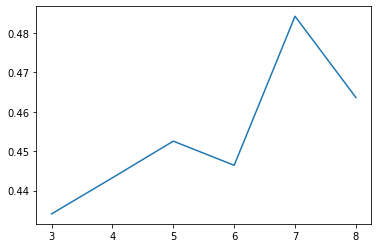

In [ ]:
plt.plot(topic_num, coherence)

In [ ]:
opt_num = 7
lda_model = gensim.models.LdaModel(corpus = bow_corpus,
                                        id2word = dictionary,
                                        num_topics = opt_num,
                                        offset = 2,
                                        random_state = 123,
                                        update_every = 1,
                                        passes = 10,
                                        alpha = 'auto',
                                        eta = "auto",
                                        per_word_topics = True)

In [ ]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.034*"effect" + 0.032*"side" + 0.031*"feel" + 0.021*"day" + 0.021*"week" + '
  '0.017*"take" + 0.016*"start" + 0.016*"like" + 0.012*"first" + 0.011*"get"'),
 (1,
  '0.029*"took" + 0.027*"day" + 0.018*"hour" + 0.018*"pill" + 0.016*"take" + '
  '0.015*"work" + 0.013*"time" + 0.012*"go" + 0.010*"start" + 0.010*"water"'),
 (2,
  '0.031*"cramp" + 0.028*"period" + 0.022*"pain" + 0.020*"get" + 0.019*"month" '
  '+ 0.019*"day" + 0.019*"bleed" + 0.016*"got" + 0.012*"week" + '
  '0.012*"insert"'),
 (3,
  '0.018*"patch" + 0.018*"inject" + 0.017*"use" + 0.011*"drug" + 0.010*"insur" '
  '+ 0.009*"effect" + 0.008*"one" + 0.008*"tri" + 0.007*"cover" + '
  '0.007*"doctor"'),
 (4,
  '0.044*"weight" + 0.033*"month" + 0.028*"gain" + 0.018*"year" + 0.018*"pill" '
  '+ 0.015*"control" + 0.015*"pound" + 0.014*"start" + 0.013*"lost" + '
  '0.012*"lb"'),
 (5,
  '0.017*"year" + 0.017*"take" + 0.016*"anxieti" + 0.015*"life" + '
  '0.014*"medic" + 0.011*"work" + 0.011*"drug" + 0.011*"feel" + '
  '0.011*

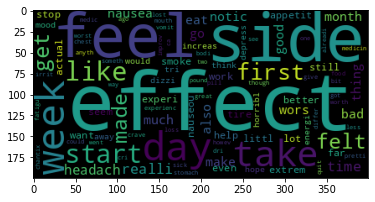

In [ ]:
# Plot WordCloud of 1st topic
plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(0, 100))))

In [ ]:
# Compute Perplexity (lower is better)
print('Perplexity: ', np.exp(lda_model.log_perplexity(bow_corpus)))  

# Compute Coherence Score (higher is better)
coherence_model_lda = CoherenceModel(model=lda_model, texts=reviews, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Output streaming troncato alle ultime 5000 righe.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt 

Perplexity:  0.001068817281080258

Coherence Score:  0.48422873078162026


## Visualizations

### Data preparation

In [ ]:
def find_topic(row, which = 0):
  idx = row['index']
  coherences = lda_model.__getitem__(bow=bow_corpus[idx], eps=0)[0]
  coherences = sorted(coherences, key = lambda x: x[1], reverse = True)
  return [coherences[which][0],coherences[which][1]]

In [ ]:
# See the most relevant topic for each review
data['index'] = [i for i in range(data.shape[0])]
data['top_topic'] = data.apply(lambda x: find_topic(x, which = 0)[0], axis = 1)
data['top_topic_probability'] = data.apply(lambda x: find_topic(x, which = 0)[1], axis = 1)

data.head()

drugName           condition  \
0    trazodone            Insomnia   
1  fluvoxamine  Anxiety and Stress   
2  mirtazapine             Anxiety   
3    trazodone          Depression   
4  mirtazapine             Anxiety   

                                              review  rating  \
0  "I have insomnia, it's horrible. My story begi...    10.0   
1  "I've suffered from panic attacks and anxiety ...     9.0   
2  "Suffered from anxiety and depression for 3 mo...    10.0   
3  "I take trazodone to help balance the effects ...    10.0   
4  "I have taken this medicine for 7 years. Gaine...    10.0   

               date  positiveness        drugClass  index  top_topic  \
0     April 3, 2016             1  antidepressants      0          6   
1   January 3, 2011             1  antidepressants      1          5   
2      May 31, 2012             1  antidepressants      2          5   
3      June 1, 2016             1  antidepressants      3          6   
4  November 6, 2012             1  antidepressants      4          6   

   top_topic_probability  
0               0.574574  
1               0.769422  
2               0.599441  
3               0.610258  
4               0.482222

### Correlation matrix

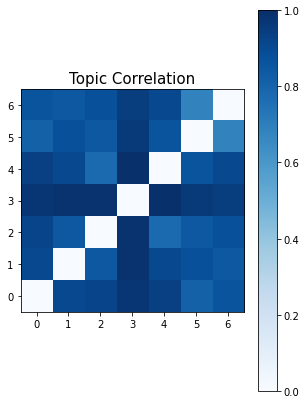

In [ ]:
mdiff, annotation = lda_model.diff(lda_model, distance='jaccard', num_words=50)
fig, ax = plt.subplots(figsize=(5,7))
graph = ax.imshow(mdiff, cmap='Blues', origin='lower')
plt.title('Topic Correlation', fontsize = 15)
plt.colorbar(graph)

### pyLDAvis

In [ ]:
%%capture
!pip install pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.002651  0.070626       1        1  21.998876
0      0.073855  0.017734       2        1  16.838711
2      0.077168 -0.121573       3        1  15.834246
6     -0.003445  0.164314       4        1  15.707930
4      0.096677 -0.157960       5        1  13.946743
1      0.057433  0.090129       6        1  10.708683
3     -0.299038 -0.063269       7        1   4.964810, topic_info=         Term          Freq         Total Category  logprob  loglift
87     weight   8890.000000   8890.000000  Default  30.0000  30.0000
318      pain  12686.000000  12686.000000  Default  29.0000  29.0000
1766    cramp   7243.000000   7243.000000  Default  28.0000  28.0000
958   migrain   7192.000000   7192.000000  Default  27.0000  27.0000
59       gain   5770.000000   5770.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
333     howev    306.995696   2252.586273   Topic7  -5.4650   1.0098
117      side    345.649474  10482.932762   Topic7  -5.3465  -0.4093
134       bad    327.267274   6736.752809   Topic7  -5.4011  -0.0218
151     would    329.723458   9459.881654   Topic7  -5.3936  -0.3538
218     thing    304.153894   4882.833519   Topic7  -5.4743   0.2268

[513 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
1287       1  1.000037       abilifi
3620       6  0.998772         abort
3490       6  0.998398          achi
4447       5  0.999654           acn
539        1  0.104969        actual
...      ...       ...           ...
89         7  0.005120          year
14500      5  1.000833  zolmitriptan
255        1  0.998937        zoloft
3641       4  0.999777         zomig
4043       5  0.999709       zyprexa

[1082 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 3, 7, 5, 2, 4])

### t-SNE (1)

In [ ]:
# Credits to: https://stackoverflow.com/questions/60454355/draw-3d-plot-for-gensim-model

def LDA_tSNE_topics_vis(dimension='both',
                        corpus=None, 
                        num_topics=10,
                        remove_3d_outliers=False,
                        save_png=False):
    """
    Returns the outputs of an LDA model plotted using t-SNE (t-distributed Stochastic Neighbor Embedding)

    Note: t-SNE reduces the dimensionality of a space such that similar points will be closer and dissimilar points farther

    Parameters
    ----------
        dimension : str (default=both)
            The dimension that t-SNE should reduce the data to for visualization
            Options: 2d, 3d, and both (a plot with two subplots)

        corpus : list, list of lists
            The tokenized and cleaned text corpus over which analysis should be done

        num_topics : int (default=10)
            The number of categories for LDA based approaches

        remove_3d_outliers : bool (default=False)
            Whether to remove outliers from a 3d plot

        save_png : bool (default=False)
            Whether to save the figure as a png

    Returns
    -------
        A t-SNE lower dimensional representation of an LDA model's topics and their constituent members
    """
    # dirichlet_dict = corpora.Dictionary(reviews)
    # bow_corpus = [dirichlet_dict.doc2bow(text) for text in reviews]
    # dirichlet_model = LdaModel(corpus=bow_corpus,
    #                            id2word=dirichlet_dict,
    #                            num_topics=num_topics,
    #                            update_every=1,
    #                            chunksize=len(bow_corpus),
    #                            passes=10,
    #                            alpha='auto',
    #                            eta = 'auto',
    #                            random_state=123,
    #                            offset = 2,
    #                            per_word_topics = True)

    dirichlet_dict = dictionary
    dirichlet_model = lda_model

    df_topic_coherences = pd.DataFrame(columns = ['topic_{}'.format(i) for i in range(num_topics)])

    for i in range(len(bow_corpus)):
        df_topic_coherences.loc[i] = [0] * num_topics
        
        output = dirichlet_model.__getitem__(bow=bow_corpus[i], eps=0)
    
        for j in range(num_topics):
            _, coherence = output[0][j]
            df_topic_coherences.iloc[i, j] = coherence

    for i in range(num_topics):
        df_topic_coherences.iloc[:, i] = df_topic_coherences.iloc[:, i].astype('float64', copy=False)

    df_topic_coherences['main_topic'] = df_topic_coherences.iloc[:, :num_topics].idxmax(axis=1)

    if num_topics > 10:
        # cubehelix better for more than 10 colors
        colors = sns.color_palette("cubehelix", num_topics)
    else:
        # The default sns color palette
        colors = sns.color_palette('deep', num_topics)

    tsne_2 = None
    tsne_3 = None
    if dimension == 'both':
        tsne_2 = TSNE(n_components=2, perplexity=40, n_iter=300)
        tsne_3 = TSNE(n_components=3, perplexity=40, n_iter=300)
    elif dimension == '2d':
        tsne_2 = TSNE(n_components=2, perplexity=40, n_iter=300)
    elif dimension == '3d':
        tsne_3 = TSNE(n_components=3, perplexity=40, n_iter=300)
    else:
        ValueError("An invalid value has been passed to the 'dimension' argument - choose from 2d, 3d, or both.")

    if tsne_2 is not None:
        tsne_results_2 = tsne_2.fit_transform(df_topic_coherences.iloc[:, :num_topics])
        
        df_tsne_2 = pd.DataFrame()
        df_tsne_2['tsne-2d-d1'] = tsne_results_2[:,0]
        df_tsne_2['tsne-2d-d2'] = tsne_results_2[:,1]
        df_tsne_2['main_topic'] = df_topic_coherences.iloc[:, num_topics]
        df_tsne_2['color'] = [colors[int(t.split('_')[1])] for t in df_tsne_2['main_topic']]

        df_tsne_2['topic_num'] = [int(i.split('_')[1]) for i in df_tsne_2['main_topic']]
        df_tsne_2 = df_tsne_2.sort_values(['topic_num'], ascending = True).drop('topic_num', axis=1)
    
    if tsne_3 is not None:
        colors = [c for c in sns.color_palette()]

        tsne_results_3 = tsne_3.fit_transform(df_topic_coherences.iloc[:, :num_topics])
        
        df_tsne_3 = pd.DataFrame()
        df_tsne_3['tsne-3d-d1'] = tsne_results_3[:,0]
        df_tsne_3['tsne-3d-d2'] = tsne_results_3[:,1]
        df_tsne_3['tsne-3d-d3'] = tsne_results_3[:,2]
        df_tsne_3['main_topic'] = df_topic_coherences.iloc[:, num_topics]
        df_tsne_3['color'] = [colors[int(t.split('_')[1])] for t in df_tsne_3['main_topic']]

        df_tsne_3['topic_num'] = [int(i.split('_')[1]) for i in df_tsne_3['main_topic']]
        df_tsne_3 = df_tsne_3.sort_values(['topic_num'], ascending = True).drop('topic_num', axis=1)

        if remove_3d_outliers:
            # Remove those rows with values that are more than three standard deviations from the column mean
            for col in ['tsne-3d-d1', 'tsne-3d-d2', 'tsne-3d-d3']:
                df_tsne_3 = df_tsne_3[np.abs(df_tsne_3[col] - df_tsne_3[col].mean()) <= (3 * df_tsne_3[col].std())]

    if tsne_2 is not None and tsne_3 is not None:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, # pylint: disable=unused-variable
                                       figsize=(20,10))
        ax1.axis('off')

    else:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

    if tsne_2 is not None and tsne_3 is not None:
        # Plot tsne_2, with tsne_3 being added later
        ax1 = sns.scatterplot(data=df_tsne_2, x="tsne-2d-d1", y="tsne-2d-d2",
                              hue=df_topic_coherences.iloc[:, num_topics], alpha=0.3)
        
        light_grey_tup = (242/256, 242/256, 242/256)
        ax1.set_facecolor(light_grey_tup)
        ax1.axes.set_title('t-SNE 2-Dimensional Representation', fontsize=25)
        ax1.set_xlabel('tsne-d1', fontsize=20)
        ax1.set_ylabel('tsne-d2', fontsize=20)

        handles, labels = ax1.get_legend_handles_labels()
        legend_order = list(np.argsort([i.split('_')[1] for i in labels]))
        ax1.legend([handles[i] for i in legend_order], [labels[i] for i in legend_order], 
                   facecolor=light_grey_tup)

    elif tsne_2 is not None:
        # Plot just tsne_2
        ax = sns.scatterplot(data=df_tsne_2, x="tsne-2d-d1", y="tsne-2d-d2",
                             hue=df_topic_coherences.iloc[:, num_topics], alpha=0.3)

        ax.set_facecolor(light_grey_tup)
        ax.axes.set_title('t-SNE 2-Dimensional Representation', fontsize=25)
        ax.set_xlabel('tsne-d1', fontsize=20)
        ax.set_ylabel('tsne-d2', fontsize=20)

        handles, labels = ax.get_legend_handles_labels()
        legend_order = list(np.argsort([i.split('_')[1] for i in labels]))
        ax.legend([handles[i] for i in legend_order], [labels[i] for i in legend_order], 
                  facecolor=light_grey_tup)

    if tsne_2 is not None and tsne_3 is not None:
        # tsne_2 has been plotted, so add tsne_3
        ax2 = fig.add_subplot(121, projection='3d')
        ax2.scatter(xs=df_tsne_3['tsne-3d-d1'], 
                    ys=df_tsne_3['tsne-3d-d2'], 
                    zs=df_tsne_3['tsne-3d-d3'],  
                    c=df_tsne_3['color'],
                    alpha=0.3)

        ax2.set_facecolor('white')
        ax2.axes.set_title('t-SNE 3-Dimensional Representation', fontsize=25)
        ax2.set_xlabel('tsne-d1', fontsize=20)
        ax2.set_ylabel('tsne-d2', fontsize=20)
        ax2.set_zlabel('tsne-d3', fontsize=20)

        with plt.rc_context({"lines.markeredgewidth" : 0}):
            # Add handles via blank lines and order their colors to match tsne_2
            proxy_handles = [Line2D([0], [0], linestyle="none", marker='o', markersize=8,
                                    markerfacecolor=colors[i]) for i in legend_order]
            ax2.legend(proxy_handles, ['topic_{}'.format(i) for i in range(num_topics)], 
                       loc='upper left', facecolor=(light_grey_tup))

    elif tsne_3 is not None:
        # Plot just tsne_3
        ax.axis('off')
        ax.set_facecolor('white')
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(xs=df_tsne_3['tsne-3d-d1'], 
                   ys=df_tsne_3['tsne-3d-d2'], 
                   zs=df_tsne_3['tsne-3d-d3'],  
                   c=df_tsne_3['color'],
                   alpha=0.3)

        ax.set_facecolor('white')
        ax.axes.set_title('t-SNE 3-Dimensional Representation', fontsize=25)
        ax.set_xlabel('tsne-d1', fontsize=20)
        ax.set_ylabel('tsne-d2', fontsize=20)
        ax.set_zlabel('tsne-d3', fontsize=20)

        with plt.rc_context({"lines.markeredgewidth" : 0}):
            # Add handles via blank lines
            proxy_handles = [Line2D([0], [0], linestyle="none", marker='o', markersize=8,
                                    markerfacecolor=colors[i]) for i in range(len(colors))]
            ax.legend(proxy_handles, ['topic_{}'.format(i) for i in range(num_topics)], 
                      loc='upper left', facecolor=light_grey_tup)

    if save_png:
        plt.savefig('LDA_tSNE_{}.png'.format(time.strftime("%Y%m%d-%H%M%S")), bbox_inches='tight', dpi=500)

    plt.show()

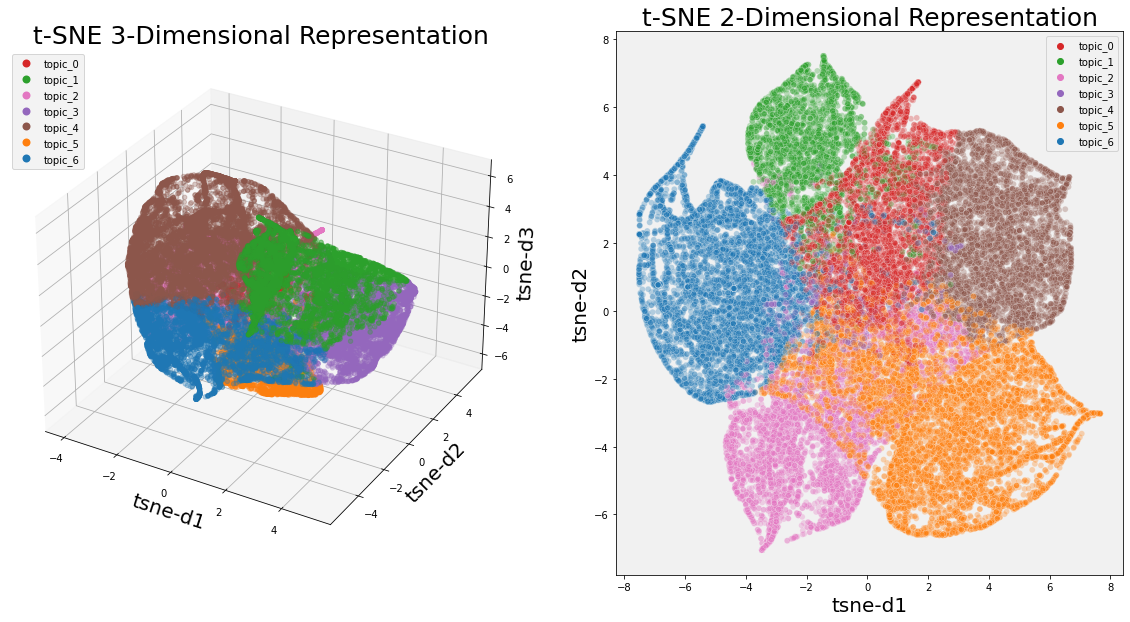

In [ ]:
LDA_tSNE_topics_vis(dimension='both',
                        corpus=None, 
                        num_topics=7,
                        remove_3d_outliers=False,
                        save_png=True)

### t-SNE (2)

In [ ]:
## Create document-topic matrix
doc_topic = pd.DataFrame(columns=['0','1','2','3','4','5','6'])
all = lda_model.get_document_topics(bow_corpus)
idx = 0
for doc_top in all:
  doc_top = {str(key):value for (key,value) in doc_top}
  doc_top = pd.DataFrame(doc_top, index = [idx])
  doc_topic = pd.concat([doc_topic,doc_top])
  idx += 1

# Fill NA values with 0
doc_topic = doc_topic.fillna(0)

In [ ]:
doc_topic.head()

0         1    2         3         4         5         6
0  0.014876  0.000000  0.0  0.033801  0.000000  0.369205  0.574277
1  0.000000  0.118134  0.0  0.000000  0.073424  0.776561  0.021298
2  0.380933  0.000000  0.0  0.000000  0.000000  0.599441  0.000000
3  0.014556  0.000000  0.0  0.000000  0.000000  0.349926  0.610240
4  0.078492  0.000000  0.0  0.000000  0.262690  0.164556  0.482241

In [ ]:
%%capture
# t-SNE
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=7, angle=.99, init='pca', perplexity = 30)

# 7-D -> 2-D
tsne_lda = tsne_model.fit_transform(doc_topic) # doc_topic is document-topic matrix

In [ ]:
# Create dataframe for plotting t-SNE in R
l = len(tsne_lda[:,0])
data_tsne = pd.DataFrame({'x_tsne' : tsne_lda[:,0], 'y_tsne' : tsne_lda[:,1], 'row_id' : data['index'],
                          'x_1_topic_probability': data['top_topic_probability']})
for i in range(7):
  data_tsne[f'{i+1}_topic'] = doc_topic[f'{i}']

In [ ]:
data_tsne.head()

x_tsne     y_tsne  row_id  x_1_topic_probability   1_topic   2_topic  \
0  40.063671  36.480450       0               0.574574  0.014876  0.000000   
1  56.331898 -12.230480       1               0.769422  0.000000  0.118134   
2  28.688704 -56.093300       2               0.599441  0.380933  0.000000   
3  42.604553  40.330315       3               0.610258  0.014556  0.000000   
4  38.051075  29.330730       4               0.482222  0.078492  0.000000   

   3_topic   4_topic   5_topic   6_topic   7_topic  
0      0.0  0.033801  0.000000  0.369205  0.574277  
1      0.0  0.000000  0.073424  0.776561  0.021298  
2      0.0  0.000000  0.000000  0.599441  0.000000  
3      0.0  0.000000  0.000000  0.349926  0.610240  
4      0.0  0.000000  0.262690  0.164556  0.482241

In [ ]:
# Save dataframe
data_tsne.to_csv('data_tsne.csv')

# ... Continue on R!

### Topic - reviews relationships

In [ ]:
def conf_int_prop(row, conf, which):
  n = row['n']
  p = row['count']/n
  z = - scipy.stats.norm.ppf((1-conf)/2, 0, 1)
  lower = round(p - z*np.sqrt((p*(1-p))/n), 3)
  upper = round(p + z*np.sqrt((p*(1-p))/n), 3)
  if which == 'lower': return lower
  else: return upper

In [ ]:
conf = .999 # must be: 0 < conf < 1

In [ ]:
# Create confidence intervals for proportion (topic prevalence in positive ratings)
results = data.groupby(['top_topic', 'positiveness'], as_index = False).count()[['top_topic', 'positiveness', 'index']].rename({'index':'count', 'top_topic' : 'topic'}, axis = 1)
n = results.groupby(['topic'], as_index = False).sum()[['topic', 'count']].rename({'count':'n'}, axis = 1)
results = pd.merge(results, n, how = 'left', on = ['topic'])
results['p'] = results.apply(lambda x: round(x['count']/x['n'], 3), axis =1)
results['lower'] = results.apply(lambda x: conf_int_prop(x, conf, 'lower'), axis = 1)
results['upper'] = results.apply(lambda x: conf_int_prop(x, conf, 'upper'), axis = 1)

# Filter positive topics
results = results[results['positiveness'] == 1]

# Rename topics
results['topic'] = results['topic'].apply(lambda x: x+1)

results.head()

topic  positiveness  count     n      p  lower  upper
1      1             1   2082  5254  0.396  0.374  0.418
3      2             1   2057  3314  0.621  0.593  0.648
5      3             1   2834  5616  0.505  0.483  0.527
7      4             1    155   393  0.394  0.313  0.476
9      5             1   2479  5392  0.460  0.437  0.482

([], [])

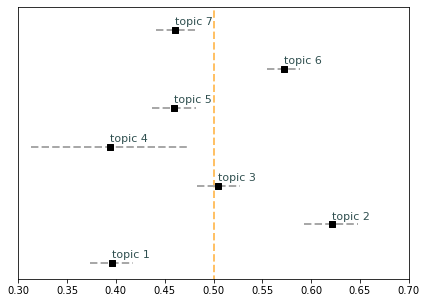

In [ ]:
# Plot
plt.figure(figsize = (7, 5))
plt.scatter('p', 'topic', data = results,
         color = 'black', s = 35, marker = 's', zorder = 1)
plt.hlines('topic', 'lower', 'upper', data = results,
           colors='#a8a8a8', linestyles = 'dashed', linewidth = 2, zorder = 0)
plt.vlines(0.5, -1, 8,
           colors='#ff9900', linestyles = 'dashed', linewidth = 2, zorder = -1, alpha = 0.6)

# annotate
annotation = results.copy()
annotation['topic_string'] = annotation['topic'].apply(lambda x: f'topic {x}')
annotation = pd.DataFrame(annotation.set_index('topic_string')[['p','topic']])
for k, v in annotation.iterrows():
    plt.annotate(k, v,
                 xytext=(0,5), textcoords='offset points',
                 family='sans-serif', fontsize=11, color='darkslategrey')
plt.xlim((0.3, 0.7))
plt.ylim((0.6, 7.6))
plt.yticks([])

In [ ]:
# Create confidence intervals for proportion (topic prevalence in positive rating for each drugClass)
results = data.groupby(['top_topic', 'positiveness', 'drugClass'], as_index = False).count()[['top_topic','drugClass', 'positiveness', 'index']].rename({'index':'count', 'top_topic' : 'topic'}, axis = 1)
n = results.groupby(['topic', 'drugClass'], as_index = False).sum()[['topic', 'drugClass','count']].rename({'count':'n'}, axis = 1)
results = pd.merge(results, n, how = 'left', on = ['topic', 'drugClass'])
results['p'] = results.apply(lambda x: round(x['count']/x['n'], 3), axis =1)
results['lower'] = results.apply(lambda x: conf_int_prop(x, conf, 'lower'), axis = 1)
results['upper'] = results.apply(lambda x: conf_int_prop(x, conf, 'upper'), axis = 1)

# Filter positive topics
results = results[results['positiveness'] == 1]

# Rename topics
results['topic'] = results['topic'].apply(lambda x: x+1)

results

topic                                          drugClass  positiveness  \
14       1                                        anorexiants             1   
15       1                                    antidepressants             1   
16       1                                antimigraine-agents             1   
17       1                            atypical-antipsychotics             1   
18       1                                     cns-stimulants             1   
..     ...                                                ...           ...   
186      7                           miscellaneous-analgesics             1   
187      7  miscellaneous-anxiolytics-sedatives-and-hypnotics             1   
188      7              nonsteroidal-anti-inflammatory-agents             1   
189      7                          skeletal-muscle-relaxants             1   
190      7                           smoking-cessation-agents             1   

     count     n      p  lower  upper  
14     246   571  0.431  0.363  0.499  
15     918  2135  0.430  0.395  0.465  
16       5    32  0.156 -0.055  0.367  
17     138   371  0.372  0.289  0.455  
18      70   195  0.359  0.246  0.472  
..     ...   ...    ...    ...    ...  
186    864  1723  0.501  0.462  0.541  
187    364   982  0.371  0.320  0.421  
188    358   666  0.538  0.474  0.601  
189    344   634  0.543  0.477  0.608  
190      3    12  0.250 -0.161  0.661  

[96 rows x 8 columns]

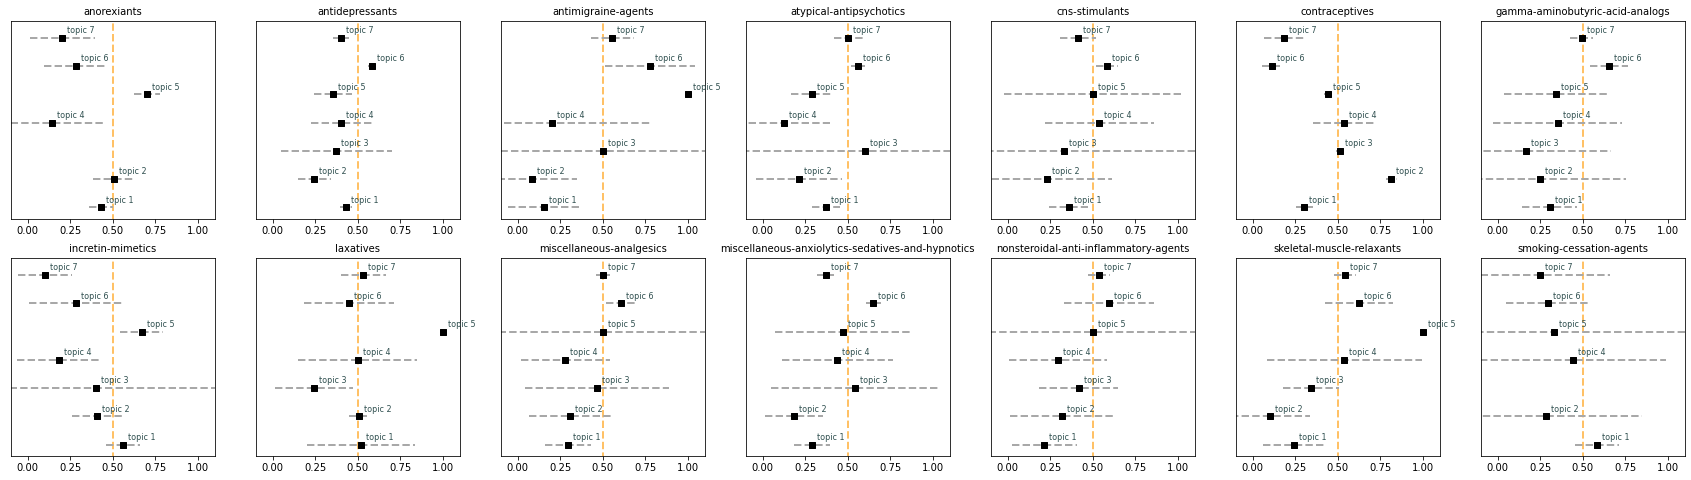

In [ ]:
# Plots
fig, axs = plt.subplots(2, 7, figsize = (30, 8))
i, j = 0, 0
for c in np.unique(results['drugClass']):
  df = results[results['drugClass'] == c]
  axs[i, j].scatter('p', 'topic', data = df,
         color = 'black', s = 35, marker = 's', zorder = 1)
  axs[i, j].hlines('topic', 'lower', 'upper', data = df,
           colors='#a8a8a8', linestyles = 'dashed', linewidth = 2, zorder = 0)
  axs[i, j].vlines(0.5, -1, 8,
           colors='#ff9900', linestyles = 'dashed', linewidth = 2, zorder = -1, alpha = 0.6)
  axs[i, j].set_title(f"{c}", fontsize = 10)
  axs[i, j].set_xlim((-0.1, 1.1))
  axs[i, j].set_ylim((0.6, 7.6))
  axs[i, j].set_yticks([])

  # annotation
  annotation = df.copy()
  annotation['topic_string'] = annotation['topic'].apply(lambda x: f'topic {x}')
  annotation = pd.DataFrame(annotation.set_index('topic_string')[['p','topic']])
  for k, v in annotation.iterrows():
      axs[i, j].annotate(k, v,
                  xytext=(5,5), textcoords='offset points',
                  family='sans-serif', fontsize=8, color='darkslategrey')
    
  j += 1
  if j == 7:
    i, j = 1, 0